# Credit EDA Assignment

In [1]:
#Importing Required Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Ignore Warnings:
import warnings
warnings.filterwarnings('ignore')

#Setting up max no. of columns and rows for bettter readability of dataset:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [2]:
#Reading the Data from the CSV file:
df0 = pd.read_csv("application_data.csv")
df1 = pd.read_csv("previous_application.csv")

df0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [3]:
#Checking the Shape of the Dataframe:
print("Shape of the Dataframe is:",df0.shape)

Shape of the Dataframe is: (307511, 122)


In [4]:
#Checking the info of the Dataframe:
print(df0.info(verbose = True, show_counts = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [5]:
#Checking the null value percentage of each columns:
df0.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

## A)Data Cleaning

In [6]:
#Drop the columns who have null values percentage greater than 40% :
print("The shape before dropping the columns:", df0.shape)

cols = (df0.isnull().mean()*100)

df0.drop(cols[cols>40].keys(), axis=1, inplace=True)

print("The shape after dropping the columns:", df0.shape)

The shape before dropping the columns: (307511, 122)
The shape after dropping the columns: (307511, 73)


### Identifying missing values:

In [7]:
null_values = df0.isnull().sum()
null_values[null_values > 0]

AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [8]:
df0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

### Defining Functions for faster analysis and better code readablitity:

In [9]:
#A Function for box plot using seaborn library:
def box_plot(column_name):
    plt.style.use('ggplot')
    sns.boxplot(df0[column_name])
    plt.title(f'Analysis of {column_name}')
    plt.show()


### Analysis of AMT_ANNUITY :

In [10]:
df0.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [11]:
print("Mean is:", df0.AMT_ANNUITY.mean())
print("Median is:", df0.AMT_ANNUITY.median())
print("Mode is:", df0.AMT_ANNUITY.mode()[0])

Mean is: 27108.573909183444
Median is: 24903.0
Mode is: 9000.0


`As there are only 12 missing records in AMT_ANNUITY we can impute it with median value as median value are not affected by the outliers`

In [12]:
#Imputing the value with Median value:
df0.AMT_ANNUITY.fillna(df0.AMT_ANNUITY.median(),inplace = True)

#Checking if the missing values are imputed:
df0.AMT_ANNUITY.isnull().sum()

0

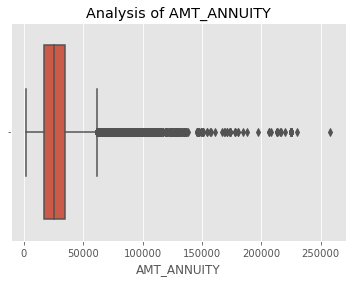

In [13]:
#Plotting a box plot to check outliers:
box_plot("AMT_ANNUITY")

`There are several outliers present in the AMT_ANNUITY`

### Analysis of AMT_GOODS_PRICE:

In [14]:
round(df0.AMT_GOODS_PRICE.describe(),0)

count     307233.0
mean      538396.0
std       369446.0
min        40500.0
25%       238500.0
50%       450000.0
75%       679500.0
max      4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [15]:
print("Mean is:", df0.AMT_GOODS_PRICE.mean())
print("Median is:", df0.AMT_GOODS_PRICE.median())
print("Mode is:", df0.AMT_GOODS_PRICE.mode()[0])

Mean is: 538396.2074288895
Median is: 450000.0
Mode is: 450000.0


`There are 278 Missing values in AMT_GOODS_PRICE we can impute it with the median value`

In [16]:
#Imputing the missing values:
df0.AMT_GOODS_PRICE.fillna(df0.AMT_GOODS_PRICE.median(), inplace = True)

#Checking if the missing values are imputed:
df0.AMT_GOODS_PRICE.isna().sum()

0

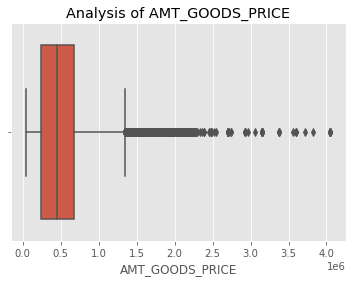

In [17]:
#PLotting a box plot to check for outliers:
box_plot('AMT_GOODS_PRICE')

### Analysis of NAME_TYPE_SUITE:

In [18]:
#Checking Unique Values:
df0.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [19]:
#Percentage of missing values:
round(df0.NAME_TYPE_SUITE.isnull().mean()*100,2)

0.42

`The percentage of missing value is very low we can impute it with the mode value, as it won't create any biasing`

In [20]:
#Checking mode:
df0.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

In [21]:
#Imputing the missing values:
df0.NAME_TYPE_SUITE.fillna(df0.NAME_TYPE_SUITE.mode()[0], inplace = True)

#Checking if the missing values are imputed:
df0.NAME_TYPE_SUITE.isna().sum()

0

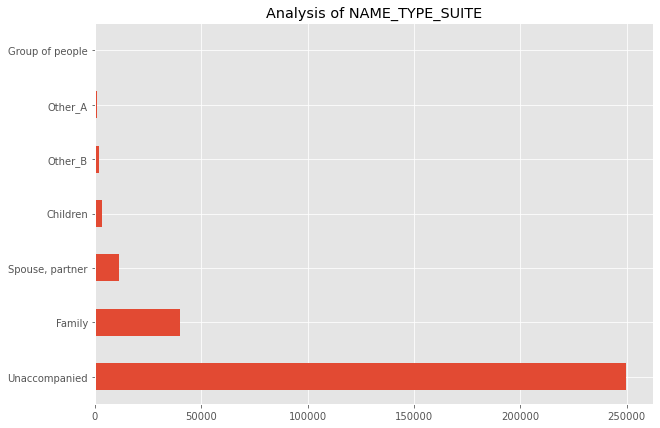

In [22]:
#Plotting a Bar Chart:
plt.figure(figsize=(10,7))
df0.NAME_TYPE_SUITE.value_counts().plot.barh()
plt.title("Analysis of NAME_TYPE_SUITE")
plt.show()

`It is clear that most of the mass lies Unaccompanied category`

### Analysis of OCCUPATION_TYPE :

In [23]:
#checking unique values:
df0.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [24]:
#Checking percentage of missing values:
round(df0.OCCUPATION_TYPE.isna().mean()*100,2)

31.35

In [25]:
#Checking number of missing values:
df0.OCCUPATION_TYPE.isna().sum()

96391

`The number of missing values present in this colunm is high so we cannot impute it with mode value as it will create a bias, so we'll refer to it as 'Others'.`

In [26]:
#Imputing the missing values:
df0.OCCUPATION_TYPE.fillna("Others", inplace= True)

#Checking if the values are imputed:
print('Number of missing values:',df0.OCCUPATION_TYPE.isna().sum())
print(df0.OCCUPATION_TYPE.value_counts())

Number of missing values: 0
Others                   96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64


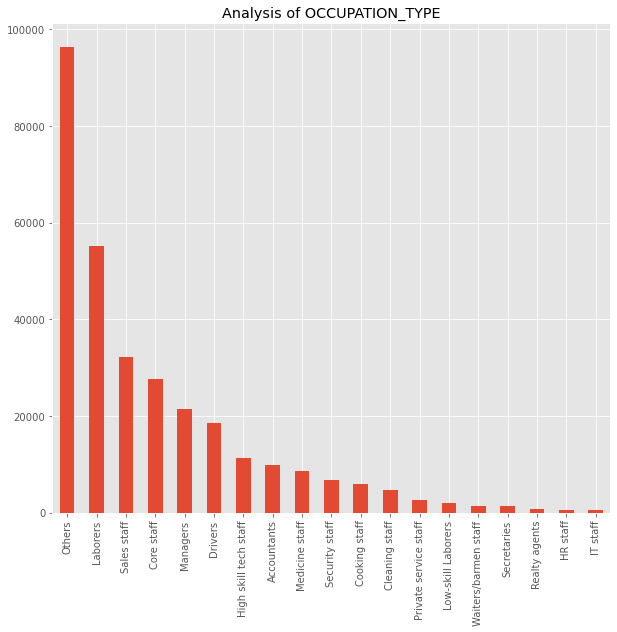

In [27]:
#Plotting a bar graph:
plt.figure(figsize=(10,9))
df0.OCCUPATION_TYPE.value_counts().plot.bar()
plt.title("Analysis of OCCUPATION_TYPE")
plt.show()

### Analysis of CNT_FAM_MEMBERS :


In [28]:
df0.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [29]:
#Checking Percentage of missing Values:
round(df0.CNT_FAM_MEMBERS.isnull().mean()*100,3)

0.001

`The records with CNT_FAM_MEMBERS missing values percentage is very low so it won't affect our analysis we can drop them`

In [30]:
#Check the records with the missing values:
df0[df0['CNT_FAM_MEMBERS'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982       33750.0         450000.0   Unaccompanied  Commercial associate   
187348      29250.0         450000.0   Unaccompanied  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                     0.015221      -12396          -1161   
187348                    0.031329      -12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
41982             -3265.0            -4489           1               1   
187348            -1597.0            -1571           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
41982                 1                 1           1           0   
187348                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982         Managers              NaN                     2   
187348     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
41982                         1               Insurance      0.700618   
187348                        0  Business Entity Type 2      0.645168   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
41982            NaN                       3.0                       0.0   
187348      0.670652                       1.0                       0.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
41982                        3.0                       0.0   
187348                       1.0                       0.0   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
41982                   -876.0                0                0   
187348                  -654.0                0                0   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
41982                 0                1                0                0   
187348                0                0                0                1   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
41982                 0                0                 0                 0   
187348                0                0                 0                 0   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
41982                  0                 0                 0   
187348                 0                 0                 0   

        FLAG_DOCUMENT_15  FLA

In [31]:
#Drop the records which have null values:
df0 = df0[~(df0['CNT_FAM_MEMBERS'].isnull())]

#Checking the shape after dropping:
df0.shape

(307509, 73)

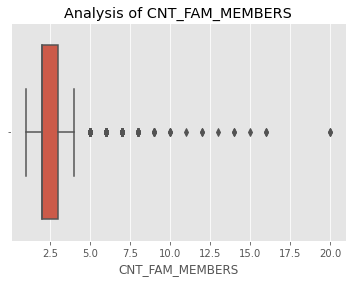

In [32]:
#Plotting a box plot to check outlier:
box_plot('CNT_FAM_MEMBERS')

`Outliers range between family having 5 to 20 members`

In [33]:
#Let's Check those Records:
df0[df0['CNT_FAM_MEMBERS']>5]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1133        101324       0         Cash loans           F            N   
1721        102013       0         Cash loans           F            N   
2348        102747       0         Cash loans           F            N   
2666        103113       1    Revolving loans           M            Y   
3079        103596       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
305112      453499       0         Cash loans           F            N   
306244      454820       0         Cash loans           F            N   
306297      454877       1    Revolving loans           F            N   
306888      455557       0         Cash loans           F            N   
307293      456016       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1133                 Y             4          121500.0   1125000.0   
1721                 Y             4          112500.0    592560.0   
2348                 N             4           67500.0    148365.0   
2666                 N             4           45000.0    180000.0   
3079                 Y             7           85500.0    411813.0   
...                ...           ...               ...         ...   
305112               N             7          112500.0    143910.0   
306244               Y             4           63000.0   1018899.0   
306297               Y             4           90000.0    202500.0   
306888               Y             5          112500.0    896643.0   
307293               N             4          135000.0    269550.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
1133        32895.0        1125000.0   Unaccompanied               Working   
1721        40086.0         450000.0   Unaccompanied               Working   
2348        11893.5         135000.0   Unaccompanied               Working   
2666         9000.0         180000.0   Unaccompanied               Working   
3079        17577.0         355500.0   Unaccompanied  Commercial associate   
...             ...              ...             ...                   ...   
305112      15399.0         135000.0   Unaccompanied               Working   
306244      29920.5         850500.0   Unaccompanied         State servant   
306297      10125.0         202500.0   Unaccompanied               Working   
306888      35689.5         724500.0   Unaccompanied             Pensioner   
307293      14242.5         225000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1133    Secondary / secondary special            Married  House / apartment   
1721    Secondary / secondary special            Married  House / apartment   
2348    Secondary / secondary special            Married  House / apartment   
2666    Secondary / secondary special            Married  House / apartment   
3079    Secondary / secondary special            Married  House / apartment   
...                               ...                ...                ...   
305112  Secondary / secondary special              Widow  House / apartment   
306244  Secondary / secondary special            Married  House / apartment   
306297  Secondary / secondary special            Married       With parents   
306888  Secondary / secondary special            Married  House / apartment   
307293  Secondary / secondary special            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
1133                      0.010966      -15155          -3115   
1721                      0.018029      -11958          -2891   
2348                      0.028663      -12272          -2733   
2666                      0.018850      -12449          -4636   
3079                      0.007120      -17676          -1065   
..

In [34]:
#Checking null values of all the columns again:
null_values = df0.isnull().sum()
null_values[null_values > 0]

EXT_SOURCE_2                    660
EXT_SOURCE_3                  60964
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41518
AMT_REQ_CREDIT_BUREAU_DAY     41518
AMT_REQ_CREDIT_BUREAU_WEEK    41518
AMT_REQ_CREDIT_BUREAU_MON     41518
AMT_REQ_CREDIT_BUREAU_QRT     41518
AMT_REQ_CREDIT_BUREAU_YEAR    41518
dtype: int64

In [35]:
#Checking Percentage of missing values:
print("% of missing values in EXT_SOURCE_2:",round(df0.EXT_SOURCE_2.isna().mean()*100,3))

print("% of missing values in EXT_SOURCE_3:",round(df0.EXT_SOURCE_3.isna().mean()*100,3))

print("% of missing values in OBS_30_CNT_SOCIAL_CIRCLE:",round(df0.OBS_30_CNT_SOCIAL_CIRCLE.isna().mean()*100,3))

print("% of missing values in DEF_30_CNT_SOCIAL_CIRCLE:",round(df0.DEF_30_CNT_SOCIAL_CIRCLE.isna().mean()*100,3))

print("% of missing values in OBS_60_CNT_SOCIAL_CIRCLE:",round(df0.OBS_60_CNT_SOCIAL_CIRCLE.isna().mean()*100,3))

print("% of missing values in DEF_60_CNT_SOCIAL_CIRCLE:",round(df0.DEF_60_CNT_SOCIAL_CIRCLE.isna().mean()*100,3))

print("% of missing values in DAYS_LAST_PHONE_CHANGE:",round(df0.DAYS_LAST_PHONE_CHANGE.isna().mean()*100,3))

print("% of missing values in AMT_REQ_CREDIT_BUREAU_HOUR:",round(df0.AMT_REQ_CREDIT_BUREAU_HOUR.isna().mean()*100,3))

print("% of missing values in AMT_REQ_CREDIT_BUREAU_DAY:",round(df0.AMT_REQ_CREDIT_BUREAU_DAY.isna().mean()*100,3))

print("% of missing values in AMT_REQ_CREDIT_BUREAU_WEEK:",round(df0.AMT_REQ_CREDIT_BUREAU_WEEK.isna().mean()*100,3))

print("% of missing values in AMT_REQ_CREDIT_BUREAU_MON:",round(df0.AMT_REQ_CREDIT_BUREAU_MON.isna().mean()*100,3))

print("% of missing values in AMT_REQ_CREDIT_BUREAU_QRT:",round(df0.AMT_REQ_CREDIT_BUREAU_QRT.isna().mean()*100,3))

print("% of missing values in AMT_REQ_CREDIT_BUREAU_YEAR:",round(df0.AMT_REQ_CREDIT_BUREAU_YEAR.isna().mean()*100,3))

% of missing values in EXT_SOURCE_2: 0.215
% of missing values in EXT_SOURCE_3: 19.825
% of missing values in OBS_30_CNT_SOCIAL_CIRCLE: 0.332
% of missing values in DEF_30_CNT_SOCIAL_CIRCLE: 0.332
% of missing values in OBS_60_CNT_SOCIAL_CIRCLE: 0.332
% of missing values in DEF_60_CNT_SOCIAL_CIRCLE: 0.332
% of missing values in DAYS_LAST_PHONE_CHANGE: 0.0
% of missing values in AMT_REQ_CREDIT_BUREAU_HOUR: 13.501
% of missing values in AMT_REQ_CREDIT_BUREAU_DAY: 13.501
% of missing values in AMT_REQ_CREDIT_BUREAU_WEEK: 13.501
% of missing values in AMT_REQ_CREDIT_BUREAU_MON: 13.501
% of missing values in AMT_REQ_CREDIT_BUREAU_QRT: 13.501
% of missing values in AMT_REQ_CREDIT_BUREAU_YEAR: 13.501


In [36]:
#Check the shape before Dropping:
print("The shape before dropping is:",df0.shape)

#Drop the records having missing values less than 1% as it won't create any significant difference in our analysis:
df0 = df0[~(df0['EXT_SOURCE_2'].isnull())]
df0 = df0[~(df0['OBS_30_CNT_SOCIAL_CIRCLE'].isnull())]
df0 = df0[~(df0['DEF_30_CNT_SOCIAL_CIRCLE'].isnull())]
df0 = df0[~(df0['OBS_60_CNT_SOCIAL_CIRCLE'].isnull())]
df0 = df0[~(df0['DEF_60_CNT_SOCIAL_CIRCLE'].isnull())]
df0 = df0[~(df0['DAYS_LAST_PHONE_CHANGE'].isnull())]

#Check the shape after Dropping:
print("The shape after dropping is:",df0.shape)

The shape before dropping is: (307509, 73)
The shape after dropping is: (305832, 73)


In [37]:
#Checking null values of all the columns again:
null_values = df0.isnull().sum()
res =null_values[null_values > 0]
res


EXT_SOURCE_3                  60464
AMT_REQ_CREDIT_BUREAU_HOUR    41216
AMT_REQ_CREDIT_BUREAU_DAY     41216
AMT_REQ_CREDIT_BUREAU_WEEK    41216
AMT_REQ_CREDIT_BUREAU_MON     41216
AMT_REQ_CREDIT_BUREAU_QRT     41216
AMT_REQ_CREDIT_BUREAU_YEAR    41216
dtype: int64

<Figure size 720x648 with 0 Axes>

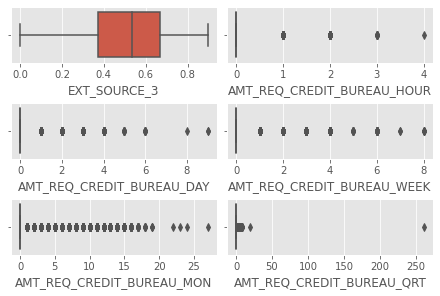

In [38]:
#Plotting the box plot for all the remaining columns to check for the outliers:
cols = list(res.keys())
plt.figure(figsize=(10,9))
fig, axes = plt.subplots(3, 2, constrained_layout=True)
for i, j in zip(axes.flatten(),cols):        #Using For loop 
    sns.boxplot(df0[j],ax=i)
plt.show()


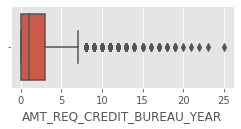

In [39]:
plt.figure(figsize=(4,1.5))
sns.boxplot(df0.AMT_REQ_CREDIT_BUREAU_YEAR)
plt.show()

`Except for EXT_SOURCE_3 all the columns have many potential outliers.
Except for EXT_SOURCE_3 & AMT_REQ_CREDIT_BUREAU_YEAR, other box plots have their upper and lower whiskers are seemingly overlapped.`

In [40]:
#Let's check the statistics of above the columns, to see if can treat the missing values:
df0[cols].describe()

EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count  245368.000000               264616.000000              264616.000000   
mean        0.510692                    0.006398                   0.006999   
std         0.194849                    0.083843                   0.110637   
min         0.000527                    0.000000                   0.000000   
25%         0.370650                    0.000000                   0.000000   
50%         0.535276                    0.000000                   0.000000   
75%         0.669057                    0.000000                   0.000000   
max         0.896010                    4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               264616.000000              264616.000000   
mean                     0.034408                   0.267565   
std                      0.204532                   0.915697   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              264616.000000               264616.000000  
mean                    0.265902                    1.901975  
std                     0.794951                    1.869434  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

In [41]:
df0[cols].mode()

EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0        0.7463                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0

In [42]:
df0[cols].nunique()

EXT_SOURCE_3                  814
AMT_REQ_CREDIT_BUREAU_HOUR      5
AMT_REQ_CREDIT_BUREAU_DAY       9
AMT_REQ_CREDIT_BUREAU_WEEK      9
AMT_REQ_CREDIT_BUREAU_MON      24
AMT_REQ_CREDIT_BUREAU_QRT      11
AMT_REQ_CREDIT_BUREAU_YEAR     25
dtype: int64

In [43]:
df0.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    263133
1.0      1288
2.0       105
3.0        45
4.0        25
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

`After checking the statistics, we find that the mode and median of the columns are zero or close to zero so its safe to impute them mode/median.`

In [44]:
#Imputing the missing values with mode:
df0.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df0.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0], inplace=True)

df0.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df0.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0], inplace=True)

df0.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df0.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0], inplace=True)

df0.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df0.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0], inplace=True)

df0.AMT_REQ_CREDIT_BUREAU_MON.fillna(df0.AMT_REQ_CREDIT_BUREAU_MON.mode()[0], inplace=True)

df0.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df0.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0], inplace=True)

df0.EXT_SOURCE_3.fillna(df0.EXT_SOURCE_3.mode()[0], inplace=True)

#Checking if the missing values are imputed:
df0[cols].isna().sum()

EXT_SOURCE_3                  0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

In [45]:
#Checking for all columns:
df0.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

`As we can see there are no missing values present in our data.So can we can move forward with the sanity checks of our data.`

## B)Sanity Checks

In [46]:
#Lets Check data type for all the columns:
df0.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [47]:
#Checking no. of unique values for each columns:
df0.nunique()

SK_ID_CURR                     305832
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2542
AMT_CREDIT                       5603
AMT_ANNUITY                     13669
AMT_GOODS_PRICE                  1002
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  5
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12564
DAYS_REGISTRATION               15682
DAYS_ID_PUBLISH                  6167
FLAG_MOBIL                          1
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL  

### Lets Check Code Gender Column first:

In [48]:
#Lets Check Code Gender Column first:
df0.CODE_GENDER.value_counts()

F      201293
M      104535
XNA         4
Name: CODE_GENDER, dtype: int64

`XNA here seems unrelated with data and is also comparatively lower in number in comparison with M & F. So we will replace it mode value.`

In [49]:
#Replace the XNA with mode of the CODE_GENDER column:
print(df0.CODE_GENDER.mode()[0])

F


In [50]:
df0['CODE_GENDER'] = df0.CODE_GENDER.apply(lambda x : 'F' if x=="XNA" else x)

#Checking if the value is properly replaced:
df0.CODE_GENDER.value_counts()

F    201297
M    104535
Name: CODE_GENDER, dtype: int64

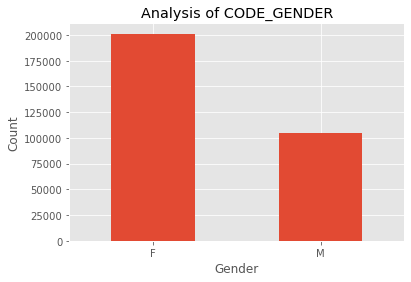

In [51]:
#Plot a bar graph:
df0.CODE_GENDER.value_counts().plot.bar()
plt.title("Analysis of CODE_GENDER")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.show()

`*              F = Female            M = Male`

### Checking ORGANIZATION_TYPE Column:

In [52]:
df0.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67579
XNA                       55047
Self-employed             38204
Other                     16608
Medicine                  11127
Business Entity Type 2    10501
Government                10356
School                     8860
Trade: type 7              7802
Kindergarten               6850
Construction               6688
Business Entity Type 1     5941
Transport: type 4          5377
Trade: type 3              3464
Industry: type 9           3351
Industry: type 3           3263
Security                   3234
Housing                    2952
Industry: type 11          2691
Military                   2623
Bank                       2478
Agriculture                2444
Police                     2329
Transport: type 2          2197
Postal                     2142
Security Ministries        1962
Trade: type 2              1884
Restaurant                 1805
Services                   1568
University                 1316
Industry: type 7           1301
Transpor

`There seems to be a 'XNA' category with a considerable amount of values and it seems to missing values. For better understanding lets merge it in the 'Other' category.`


In [53]:
#Imputing 'XNA' under 'Other' category:
df0["ORGANIZATION_TYPE"] = df0['ORGANIZATION_TYPE'].apply(lambda x: "Other" if x=="XNA" else x)

#Checking if its properly imputed: 
df0['ORGANIZATION_TYPE'].value_counts()

Other                     71655
Business Entity Type 3    67579
Self-employed             38204
Medicine                  11127
Business Entity Type 2    10501
Government                10356
School                     8860
Trade: type 7              7802
Kindergarten               6850
Construction               6688
Business Entity Type 1     5941
Transport: type 4          5377
Trade: type 3              3464
Industry: type 9           3351
Industry: type 3           3263
Security                   3234
Housing                    2952
Industry: type 11          2691
Military                   2623
Bank                       2478
Agriculture                2444
Police                     2329
Transport: type 2          2197
Postal                     2142
Security Ministries        1962
Trade: type 2              1884
Restaurant                 1805
Services                   1568
University                 1316
Industry: type 7           1301
Transport: type 3          1180
Industry

In [54]:
#Checking head and Tail of the data:
print(df0.head())
print(df0.tail())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1     

`From observing the above data we saw that some column contains values which are negative. Let's Convert it into positive for easier analysis.`

### Columns with Negative value are ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]: 

In [55]:
#Converting these values to (+)ve values:
df0["DAYS_BIRTH"] = df0["DAYS_BIRTH"].abs()
df0["DAYS_EMPLOYED"] = df0["DAYS_EMPLOYED"].abs()
df0["DAYS_REGISTRATION"] = df0["DAYS_REGISTRATION"].abs()
df0["DAYS_ID_PUBLISH"] = df0["DAYS_ID_PUBLISH"].abs()
df0["DAYS_LAST_PHONE_CHANGE"] = df0["DAYS_LAST_PHONE_CHANGE"].abs()

#Checking if the values are properly converted:
df0[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0             9461            637             3648.0             2120   
1            16765           1188             1186.0              291   
2            19046            225             4260.0             2531   
3            19005           3039             9833.0             2437   
4            19932           3038             4311.0             3458   
...            ...            ...                ...              ...   
307506        9327            236             8456.0             1982   
307507       20775         365243             4388.0             4090   
307508       14966           7921             6737.0             5150   
307509       11961           4786             2562.0              931   
307510       16856           1262             5128.0              410   

        DAYS_LAST_PHONE_CHANGE  
0                       1134.0  
1                        828.0  
2                        815.0  
3                        617.0  
4                       1106.0  
...                        ...  
307506                   273.0  
307507                     0.0  
307508                  1909.0  
307509                   322.0  
307510                   787.0  

[305832 rows x 5 columns]

## C)Data Imbalance

In [56]:
#Let's check the values of Target Variable:
df0.TARGET.value_counts()

0    281095
1     24737
Name: TARGET, dtype: int64

`0 : Non-Payment Difficulties
 1 : Payment Difficulties`

In [57]:
#Let's check the percentage:
round(df0.TARGET.value_counts(normalize=True)*100,1)

0    91.9
1     8.1
Name: TARGET, dtype: float64

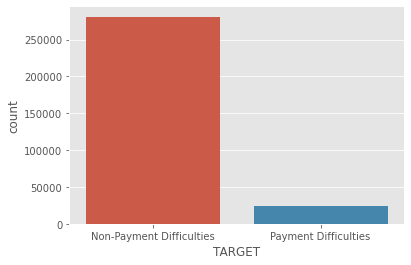

In [58]:
#Plotting the count plot:
sns.countplot(df0.TARGET)
labels = ["Non-Payment Difficulties","Payment Difficulties"]
x = [0,1]
plt.xticks(x,labels)
plt.show()

In [59]:
#Data imbalance ratio:
t0 = df0[df0.TARGET == 0]
t1 = df0[df0.TARGET == 1]
round(len(t0)/len(t1),2)

11.36

`From the above observations we can say that the data is skewed towards the Non-Payment Difficulties which we can say is true. If it was the other way around it hinder the proper functioning of bank and Data Imbalance Ratio is : 11.36%`

## D) Univariate Analysis

In [60]:
#Lets take a look at data info:
df0.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 305832 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   305832 non-null  int64  
 1   TARGET                       305832 non-null  int64  
 2   NAME_CONTRACT_TYPE           305832 non-null  object 
 3   CODE_GENDER                  305832 non-null  object 
 4   FLAG_OWN_CAR                 305832 non-null  object 
 5   FLAG_OWN_REALTY              305832 non-null  object 
 6   CNT_CHILDREN                 305832 non-null  int64  
 7   AMT_INCOME_TOTAL             305832 non-null  float64
 8   AMT_CREDIT                   305832 non-null  float64
 9   AMT_ANNUITY                  305832 non-null  float64
 10  AMT_GOODS_PRICE              305832 non-null  float64
 11  NAME_TYPE_SUITE              305832 non-null  object 
 12  NAME_INCOME_TYPE             305832 non-null  object 
 13 

In [61]:
cat_cols = ["NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","ORGANIZATION_TYPE"]
num_cols = ["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE",]

### Categorical Columns

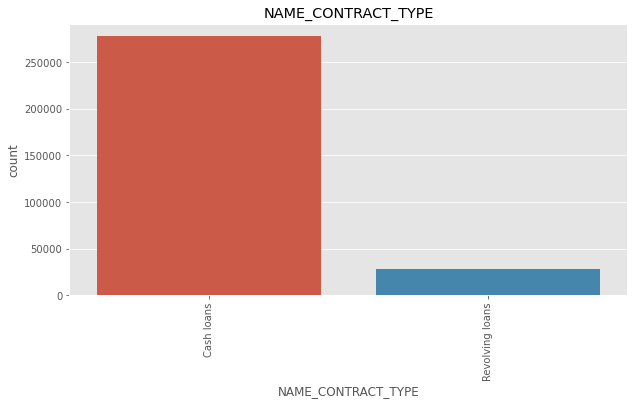

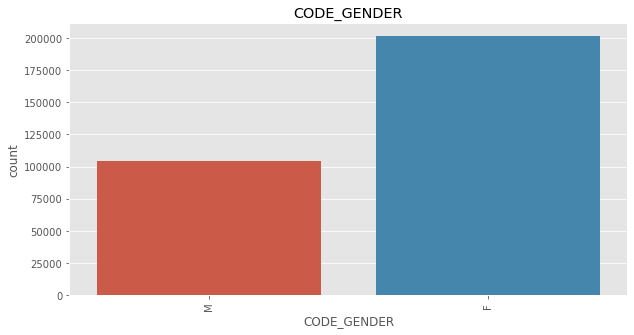

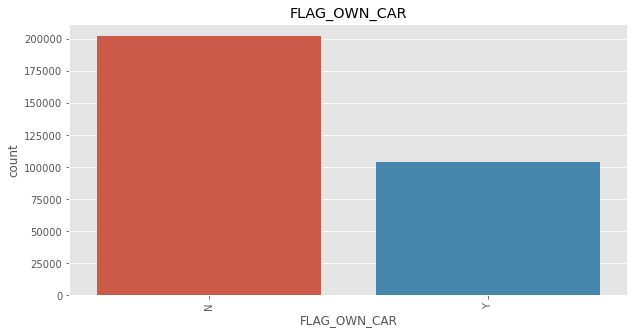

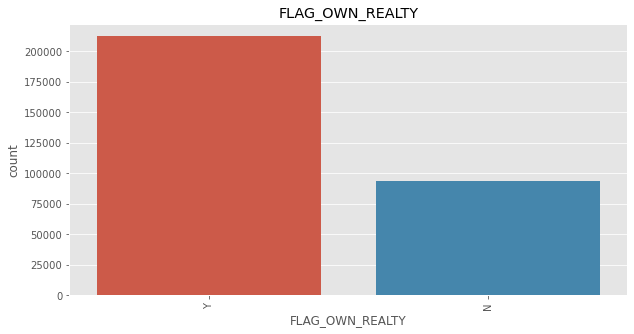

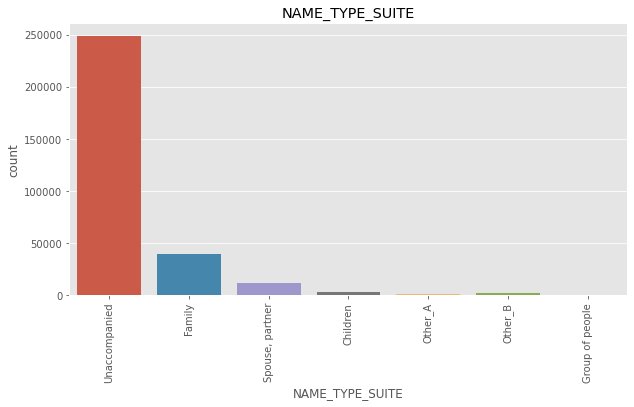

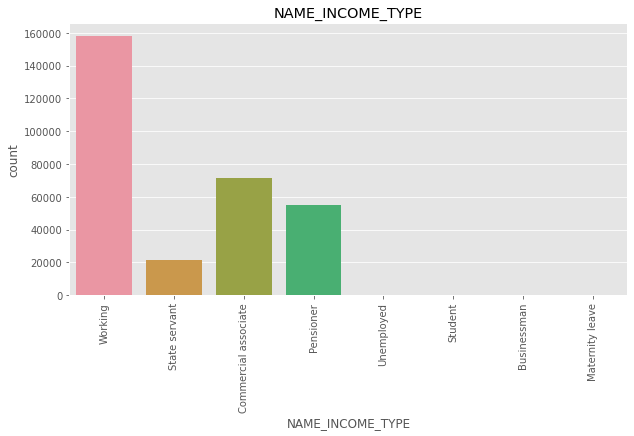

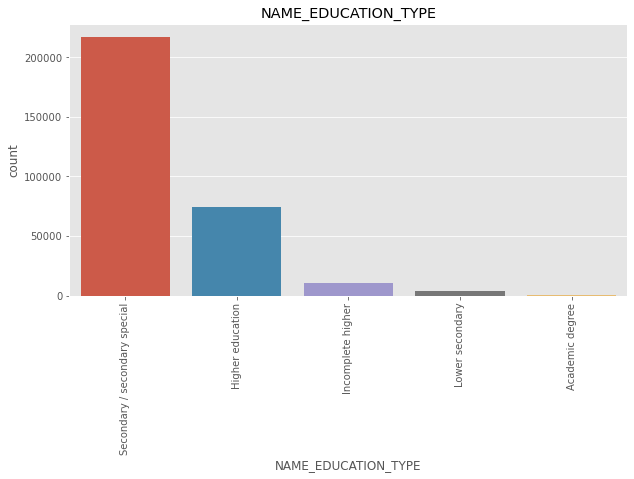

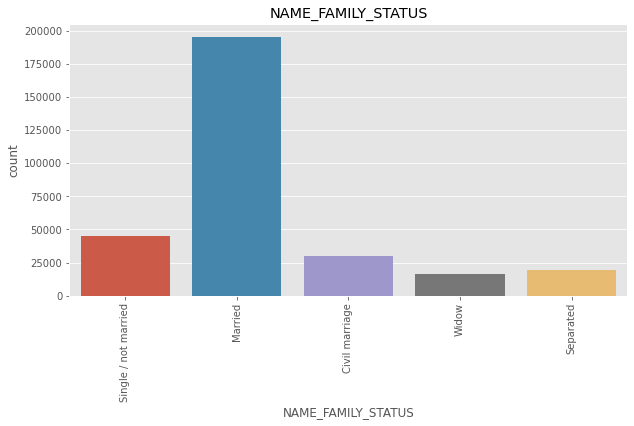

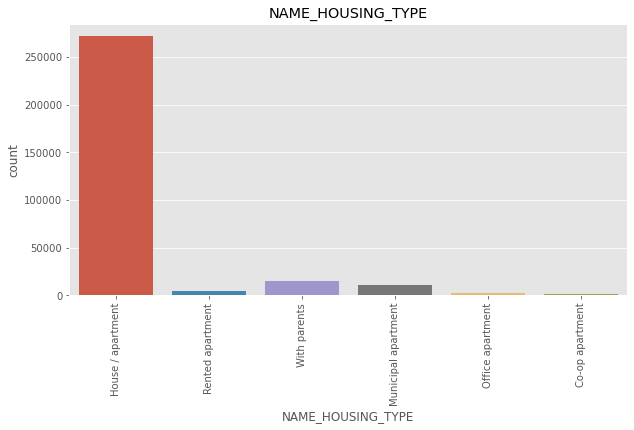

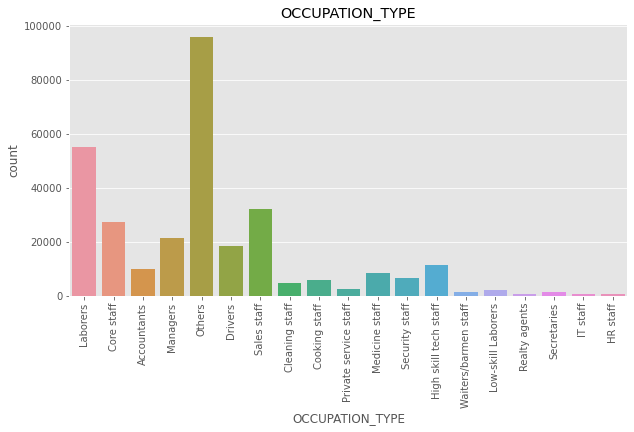

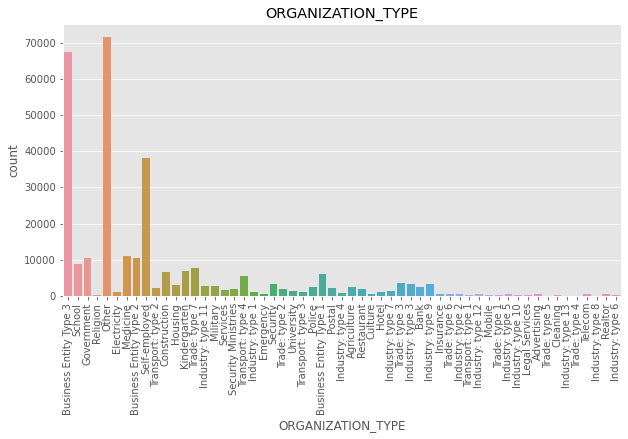

In [62]:
for i in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(df0[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

`Observartion:
1)Cash Loans are more popular than Revolving loans.
2)Females have higher chance of applying for a loan.
3)Majority of clients who applied for loan are from Working class.
4)Client with Secondary Education are more likely to apply for the loan.
5)Count of married people appyling for a loan is higher than the rest.
6)Majority of the clients have House/Apartment.
7)Laborers are more frequent customer of bank.`

### Numerical Columns

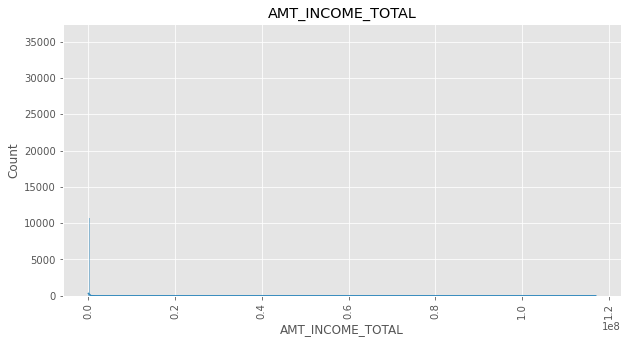

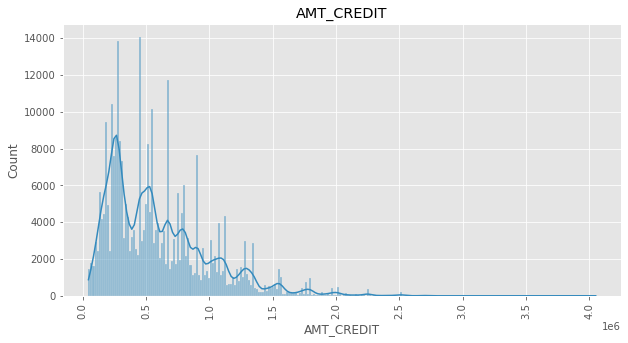

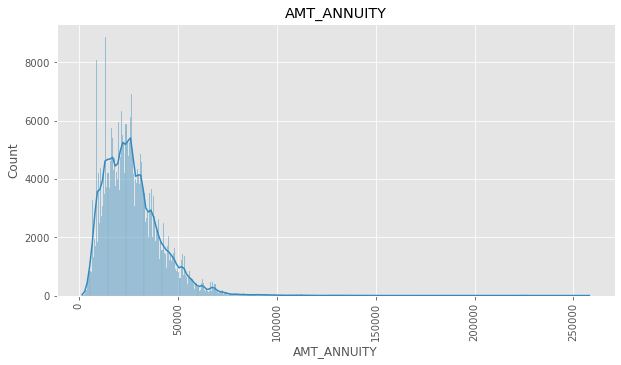

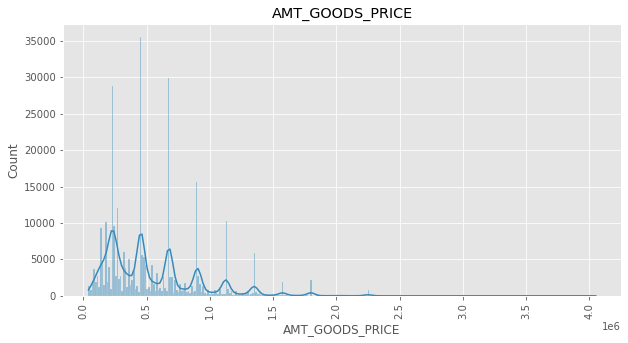

In [63]:
for i in num_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(df0[i], kde=True)
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

`It is difficult to understand it this way so we will do Segmented Univariate Analysis.`

## E) Segmented Univariate Analysis:

###### But first lets divide Age in Age Groups and Client Income in Income Groups.

In [64]:
#Let's convert age of client in years for more easier to understand format:
df0["Age_yrs"] = df0.DAYS_BIRTH.apply(lambda x: round((x/365),0))

In [65]:
df0.Age_yrs.describe()

count    305832.000000
mean         43.938214
std          11.961573
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: Age_yrs, dtype: float64

`As observed Minimum age is 21years and maximum age is 69years.`

In [66]:
#Let's assign an age group to the each client:
df0['AGE_GROUP'] = pd.cut(df0.Age_yrs,bins=np.arange(20,71,10))
df0.AGE_GROUP.value_counts()

(30, 40]    82367
(40, 50]    75112
(50, 60]    67558
(20, 30]    48575
(60, 70]    32220
Name: AGE_GROUP, dtype: int64

In [67]:
#Now let's assign the Income Groups to the each client's income:
df0["INCOME_GROUPS"] = pd.qcut(df0.AMT_INCOME_TOTAL,q=[0,0.2,0.4,0.6,0.8,1],labels=['Very Low','Low','Medium','High','Very High'])
df0.INCOME_GROUPS.value_counts()

Low          85292
High         75141
Very Low     63314
Very High    46784
Medium       35301
Name: INCOME_GROUPS, dtype: int64

In [68]:
#Let's Divide the data in two seperate dataframe on the basis of Payment difficulties(t1) and Non-Payment difficulties(t0) for better analysis:
t0 = df0[df0.TARGET == 0]      #Non-Payment Difficulties
t1 = df0[df0.TARGET == 1]      #Payment Difficulties

In [69]:
#Adding these two new column(AGE_GROUP & INCOME_GROUPS) in the categorical column list(cat_cols) for better analysis:
cat_cols.extend(["AGE_GROUP","INCOME_GROUPS"])

### Analysis of Categorical Columns(Abs Values):

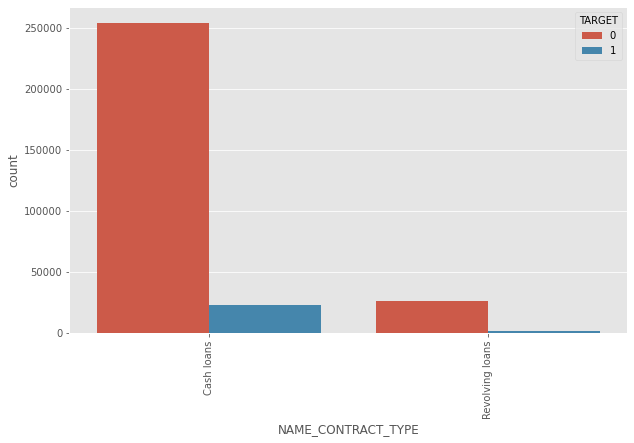

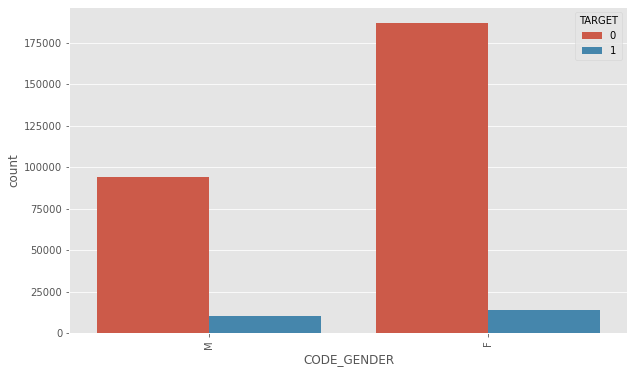

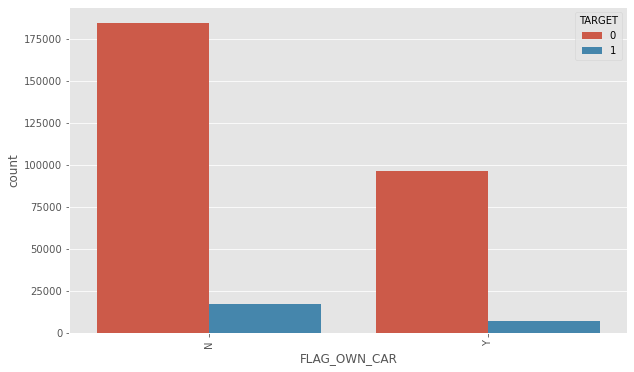

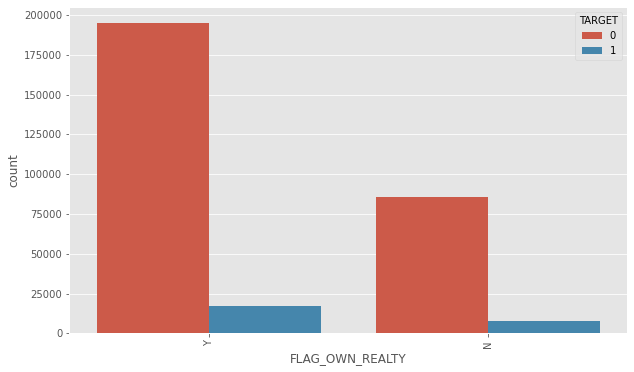

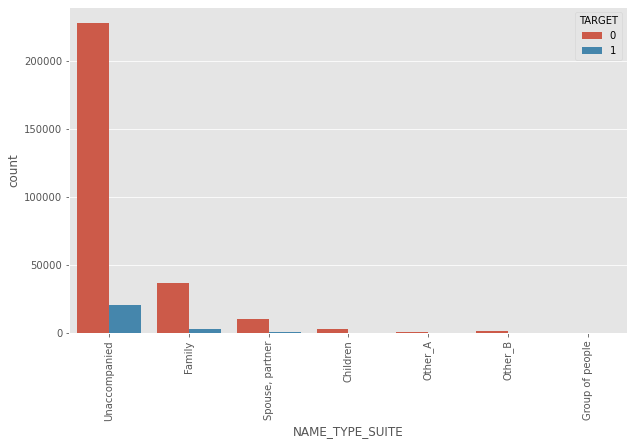

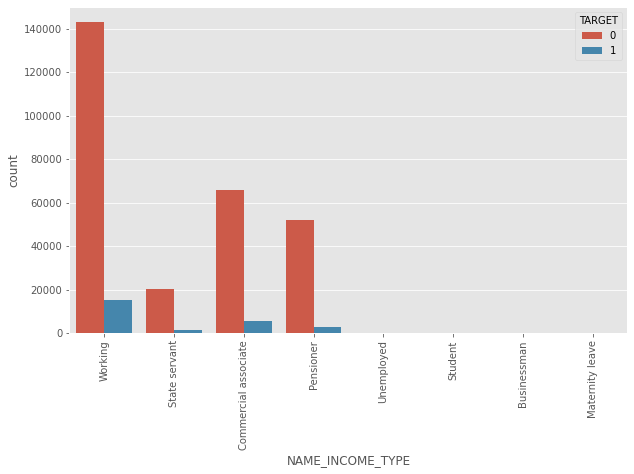

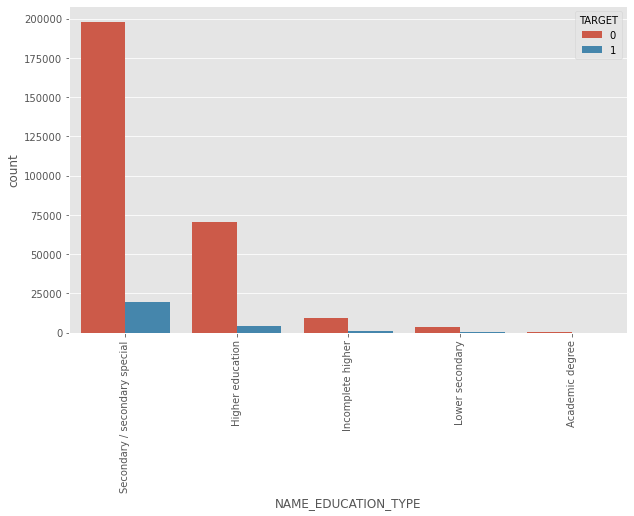

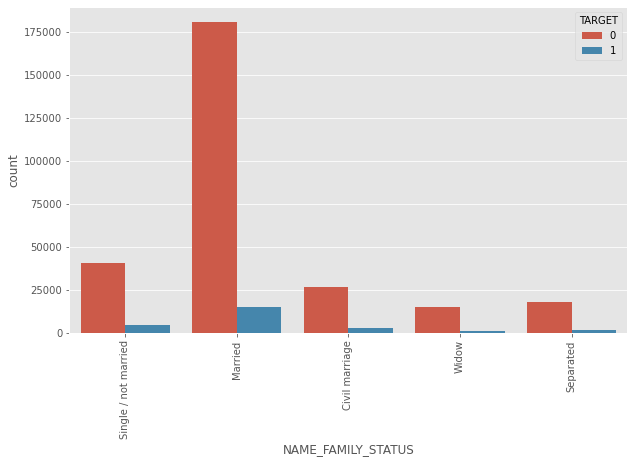

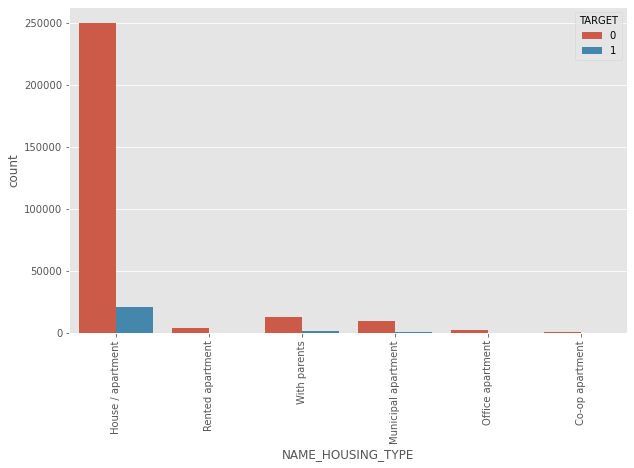

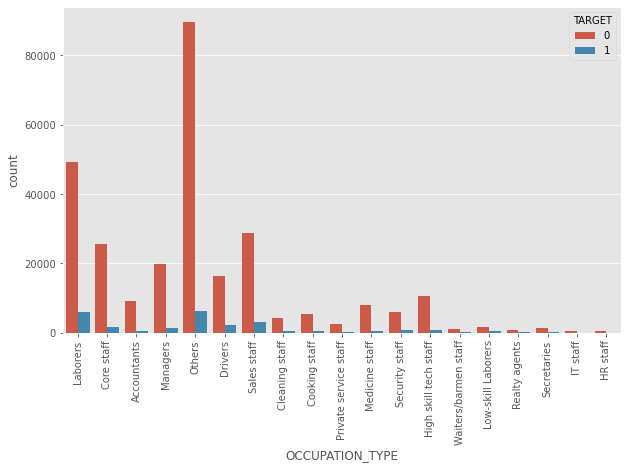

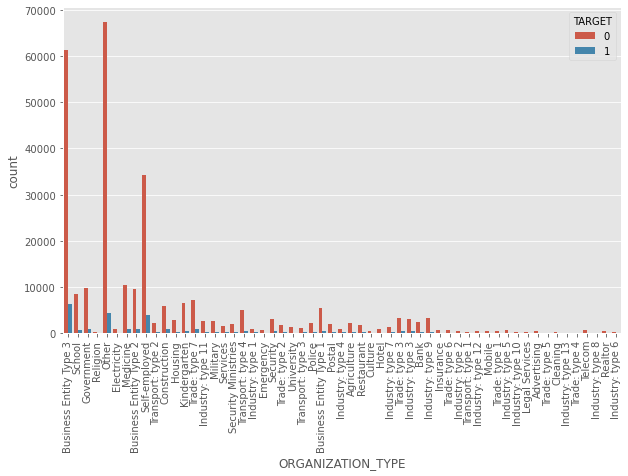

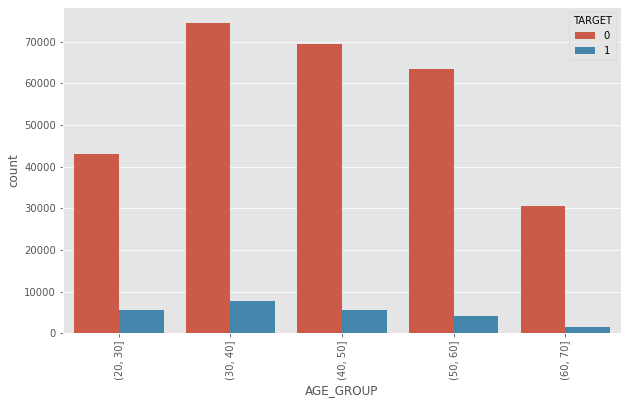

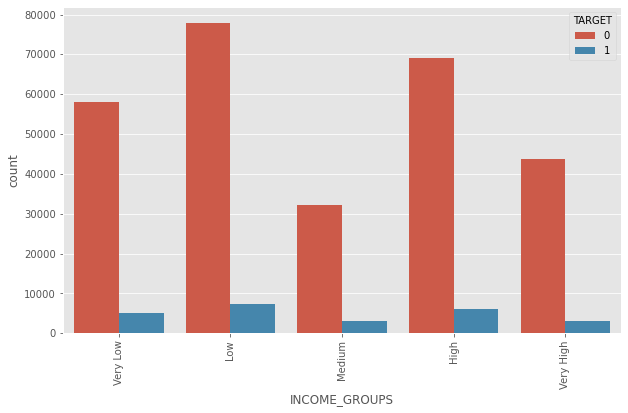

In [70]:
for col in cat_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df0, x=col, hue="TARGET")
    plt.xticks(rotation = 90)
    plt.show()

`As the data is imbalance its harder to analyse it using count of data, so let's try using count percent of values to see if there is any noticeable difference.`

### Analysis of Categorical Columns(% of Values):

In [71]:
def uni_seg_analysis(col):                                           #Function for univariate segmented analysis
    
    print(f"ANALYSIS OF {col}" )
    
    plt.figure(figsize=(20,10))
    
    plt.subplot(1,2,1)
    
    (t0[col].value_counts(normalize=True)*100).plot.bar()            #Non-Payment Difficulties
    plt.title("Non-Payment Difficulties",fontsize= 20, fontweight="bold")
    #plt.xlabel(col, fontsize= 15, fontweight="bold")
    plt.ylabel("Count %", fontsize= 15, fontweight="bold")
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 15)
    plt.yscale('linear')
    plt.legend()
    
    
    plt.subplot(1,2,2)
    
    (t1[col].value_counts(normalize=True)*100).plot.bar()            #Payment Difficulties
    plt.title("Payment Difficulties",fontsize= 20, fontweight="bold")
    #plt.xlabel(col, fontsize= 15, fontweight="bold")
    plt.ylabel("Count %", fontsize= 15, fontweight="bold")
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 15)
    plt.yscale('linear')
    plt.legend()
    
    plt.show()

ANALYSIS OF NAME_CONTRACT_TYPE


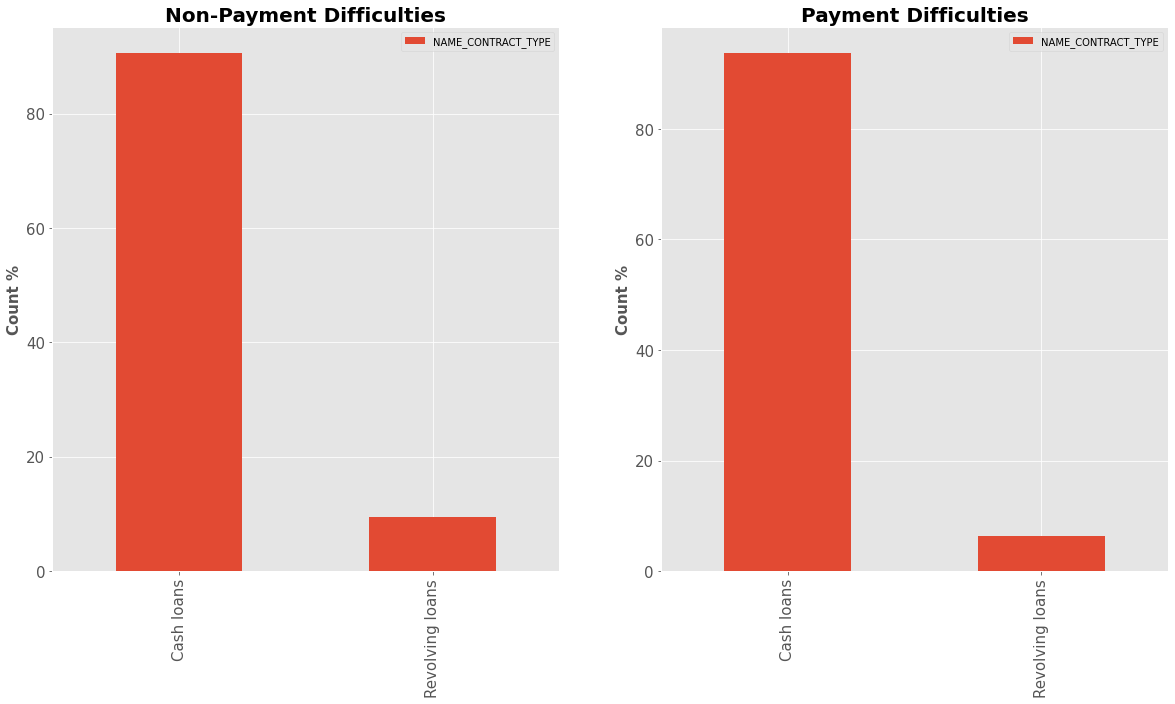

ANALYSIS OF CODE_GENDER


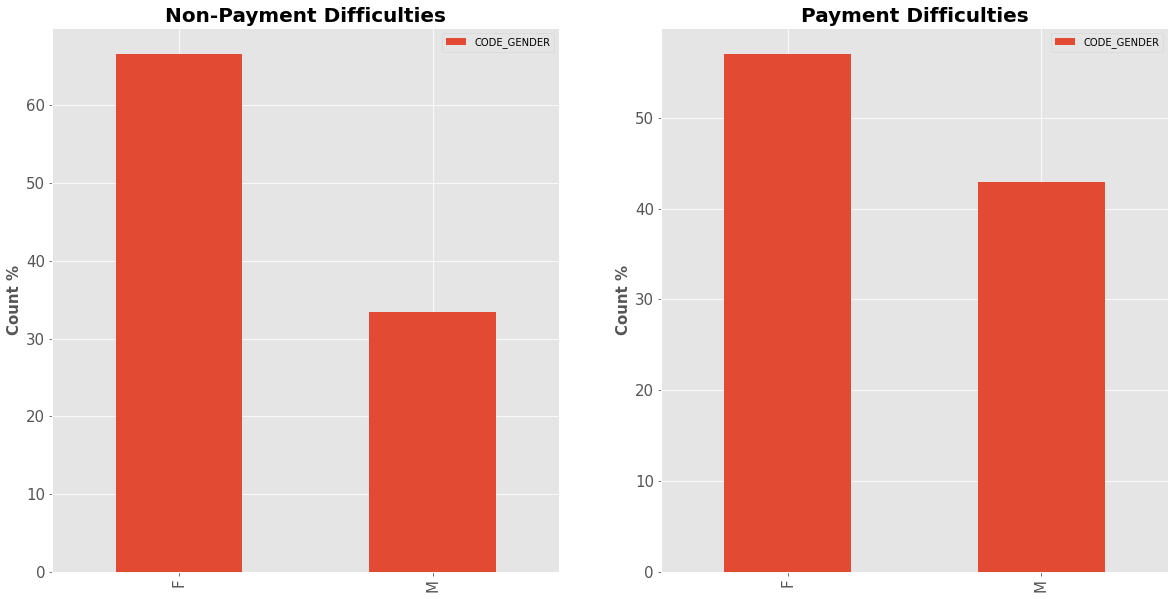

ANALYSIS OF FLAG_OWN_CAR


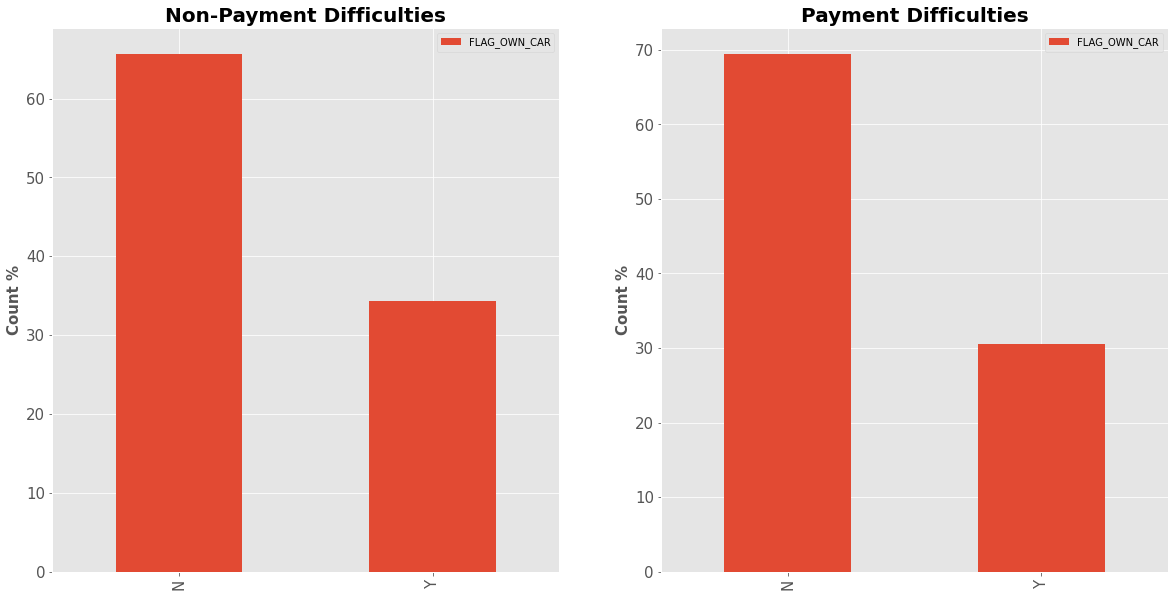

ANALYSIS OF FLAG_OWN_REALTY


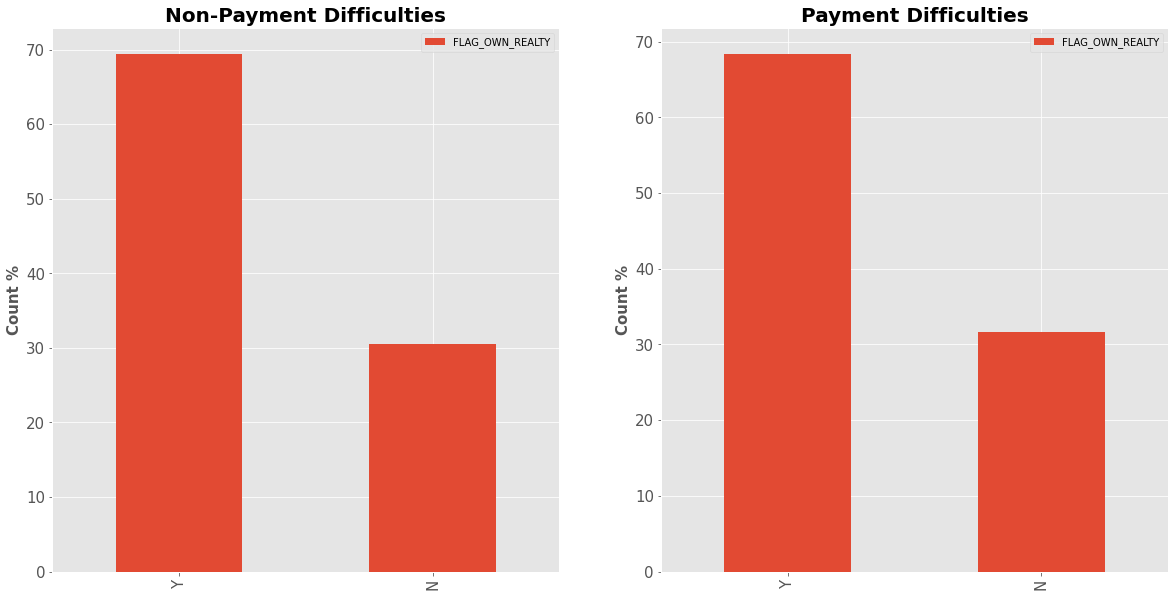

ANALYSIS OF NAME_TYPE_SUITE


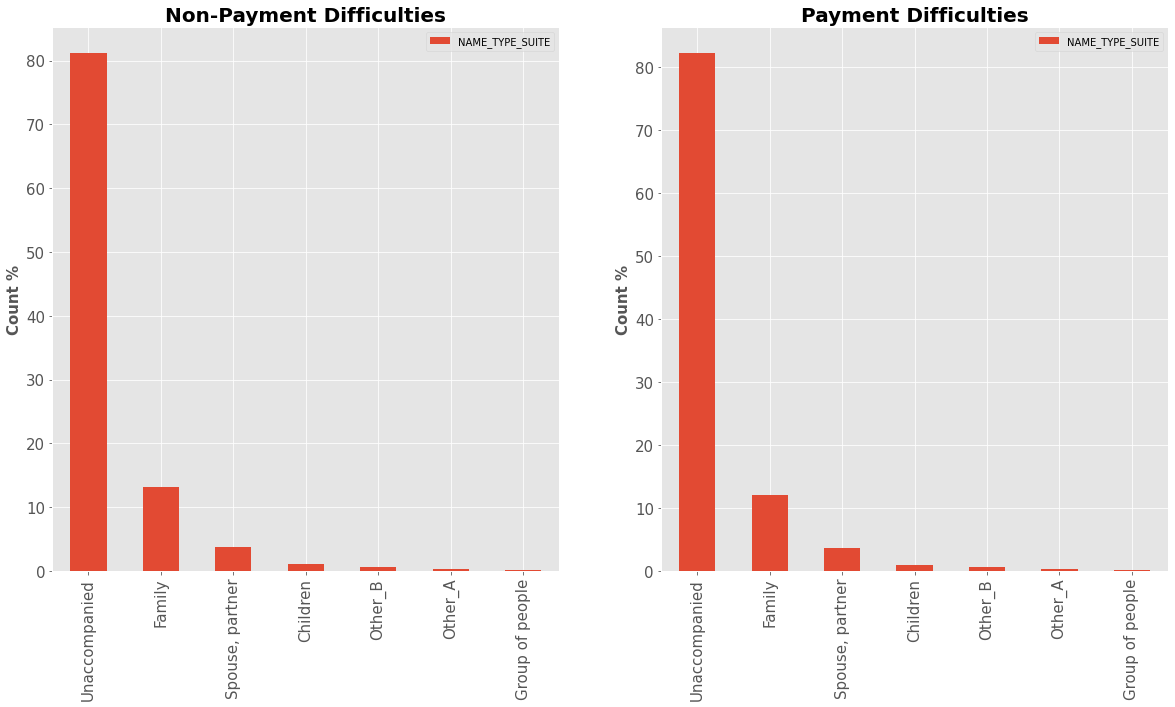

ANALYSIS OF NAME_INCOME_TYPE


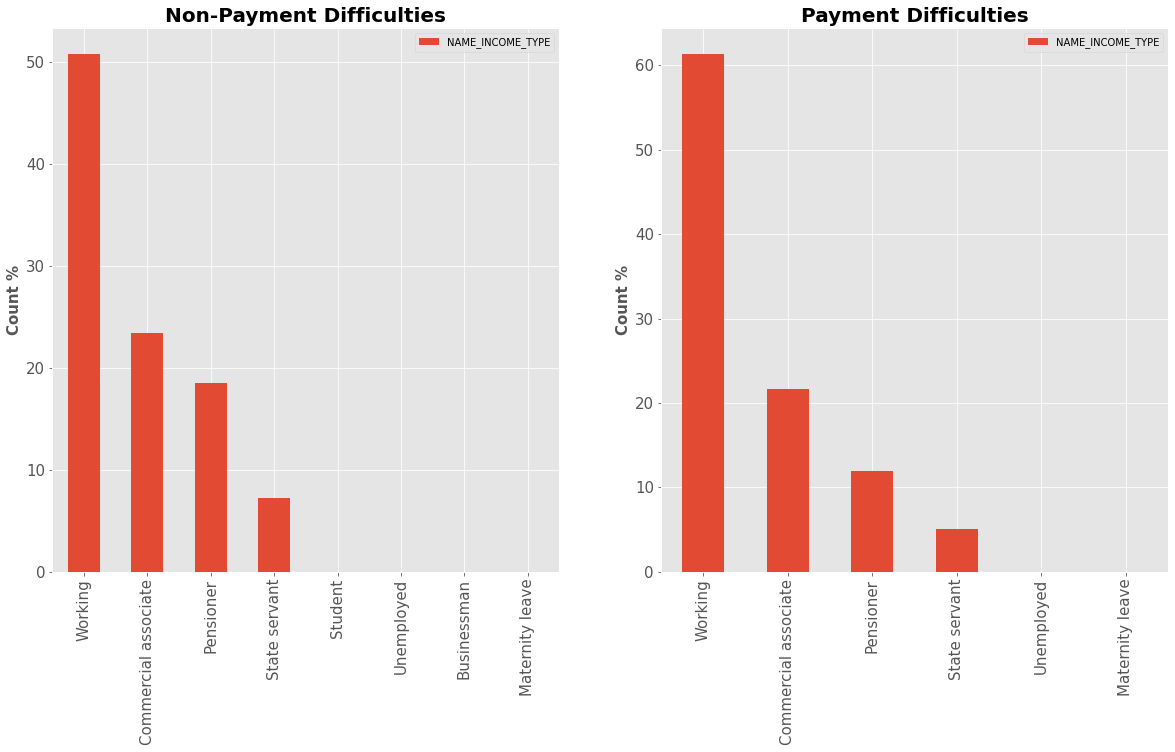

ANALYSIS OF NAME_EDUCATION_TYPE


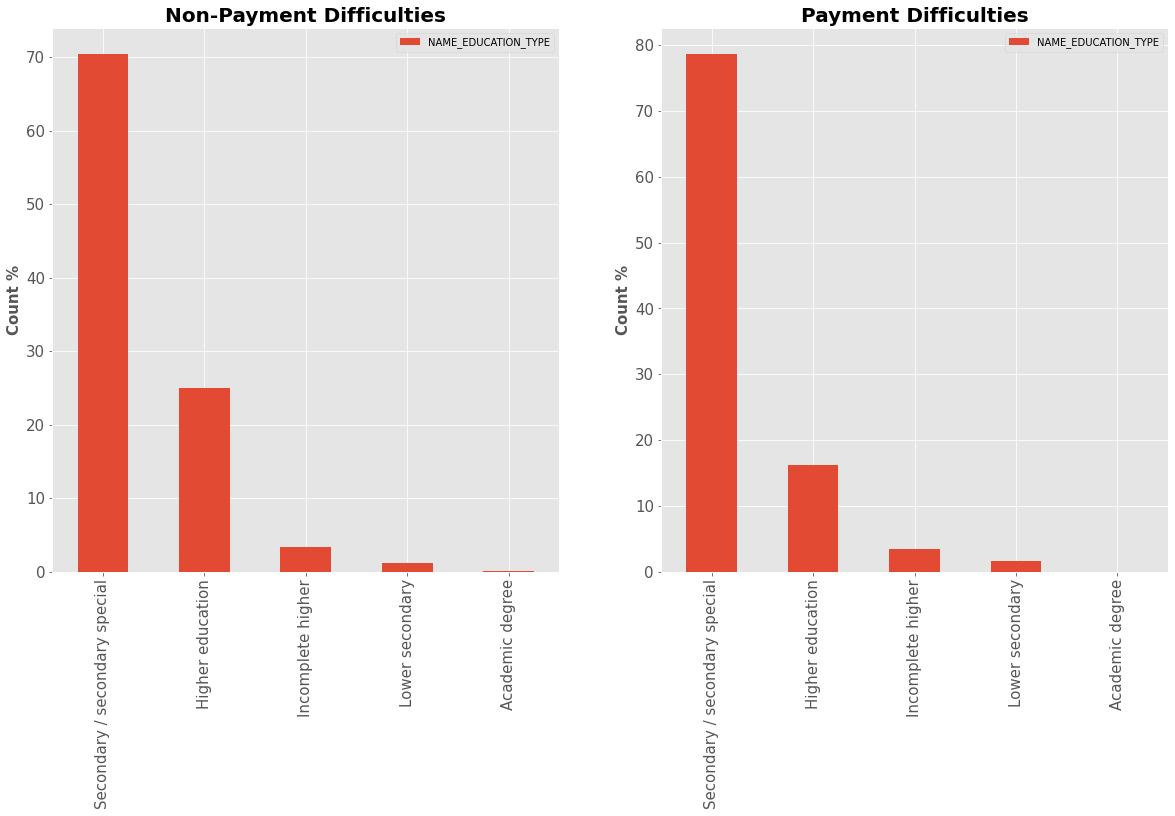

ANALYSIS OF NAME_FAMILY_STATUS


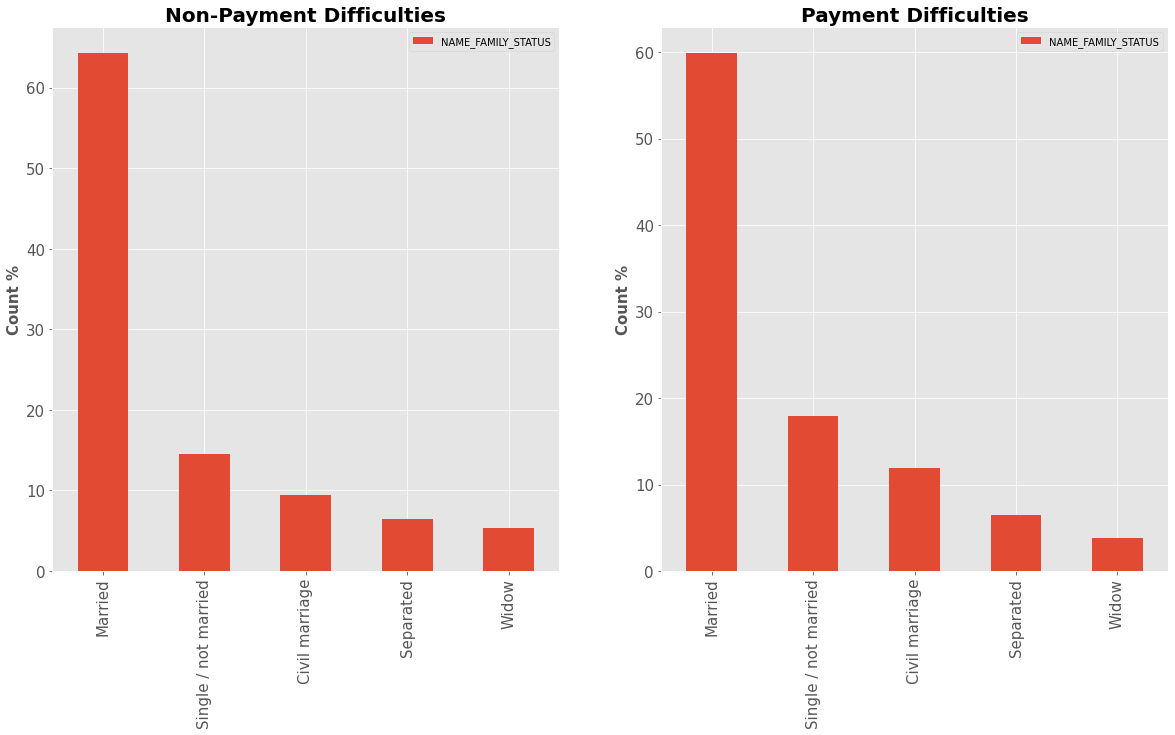

ANALYSIS OF NAME_HOUSING_TYPE


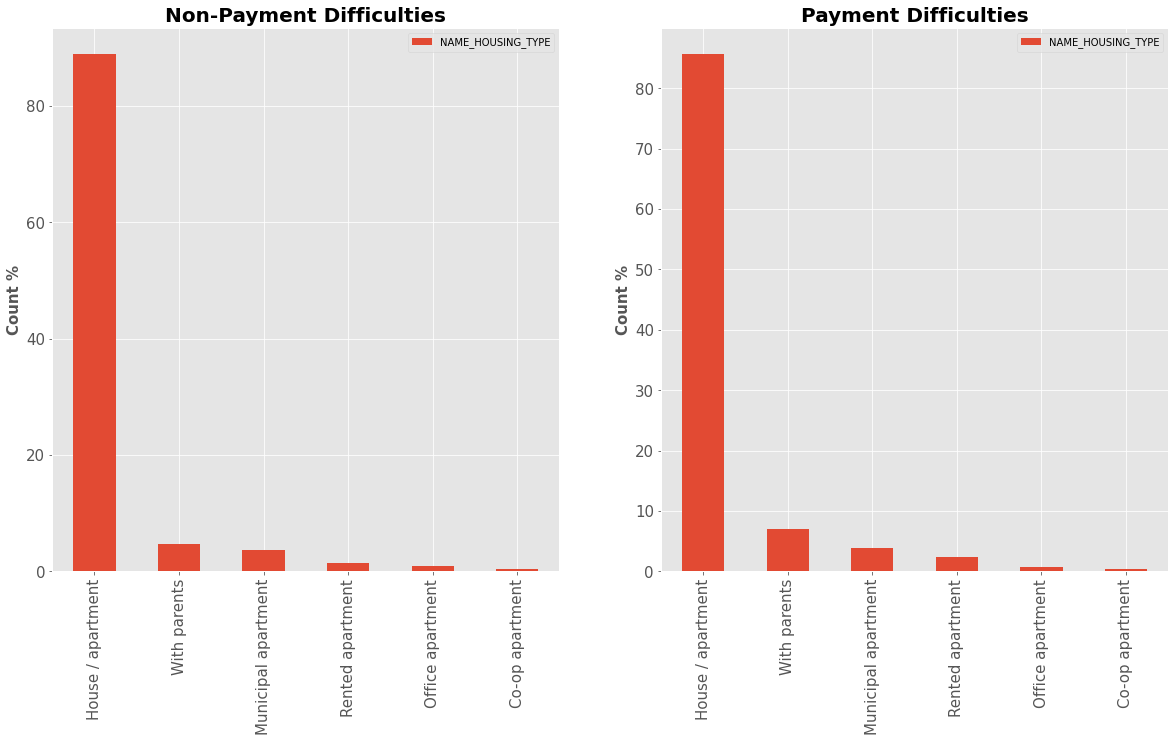

ANALYSIS OF OCCUPATION_TYPE


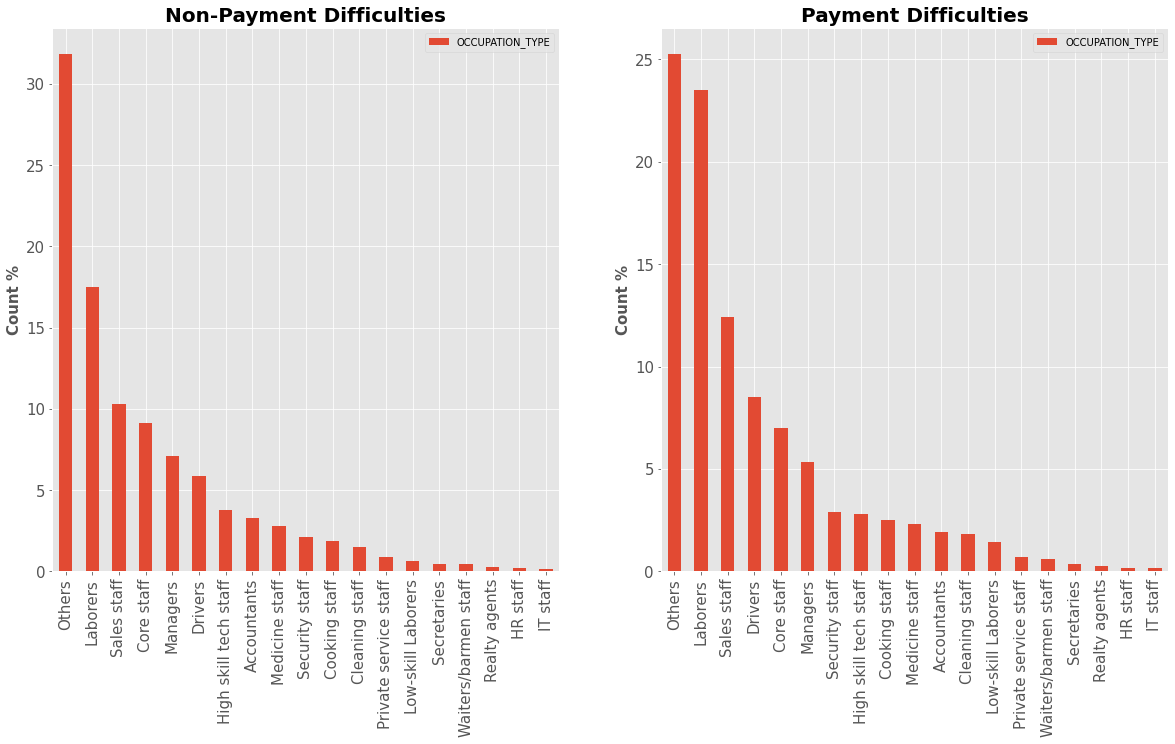

ANALYSIS OF ORGANIZATION_TYPE


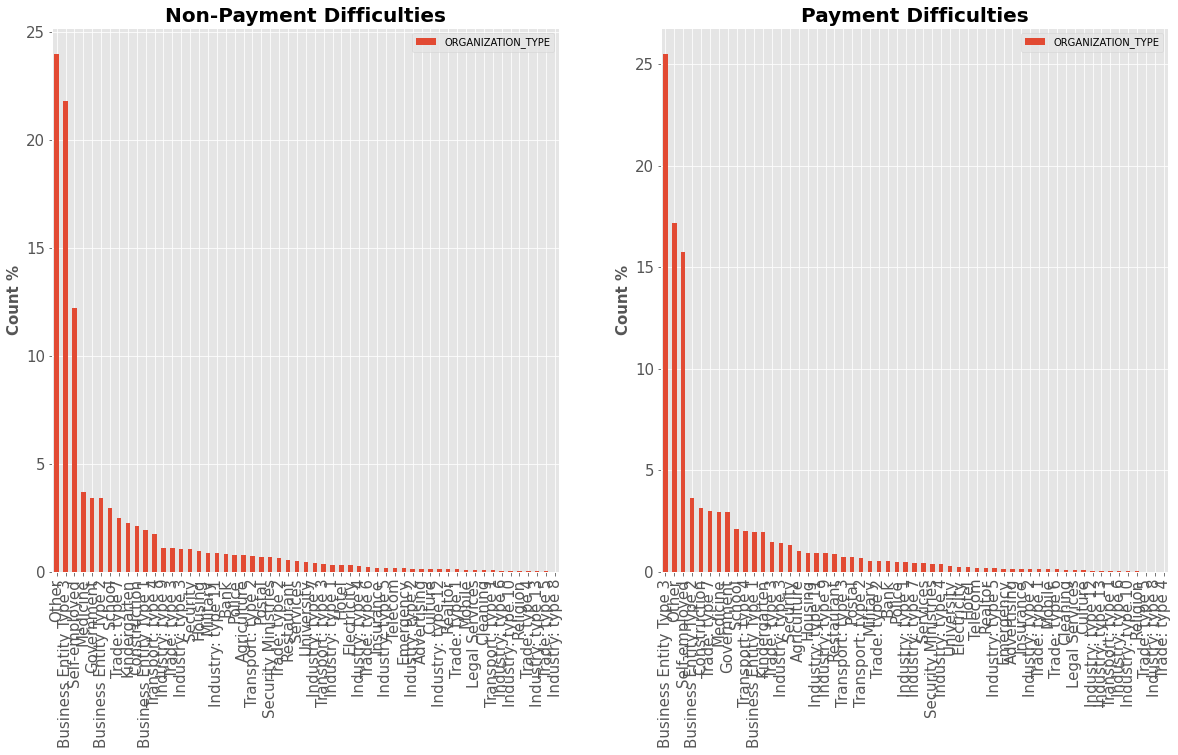

ANALYSIS OF AGE_GROUP


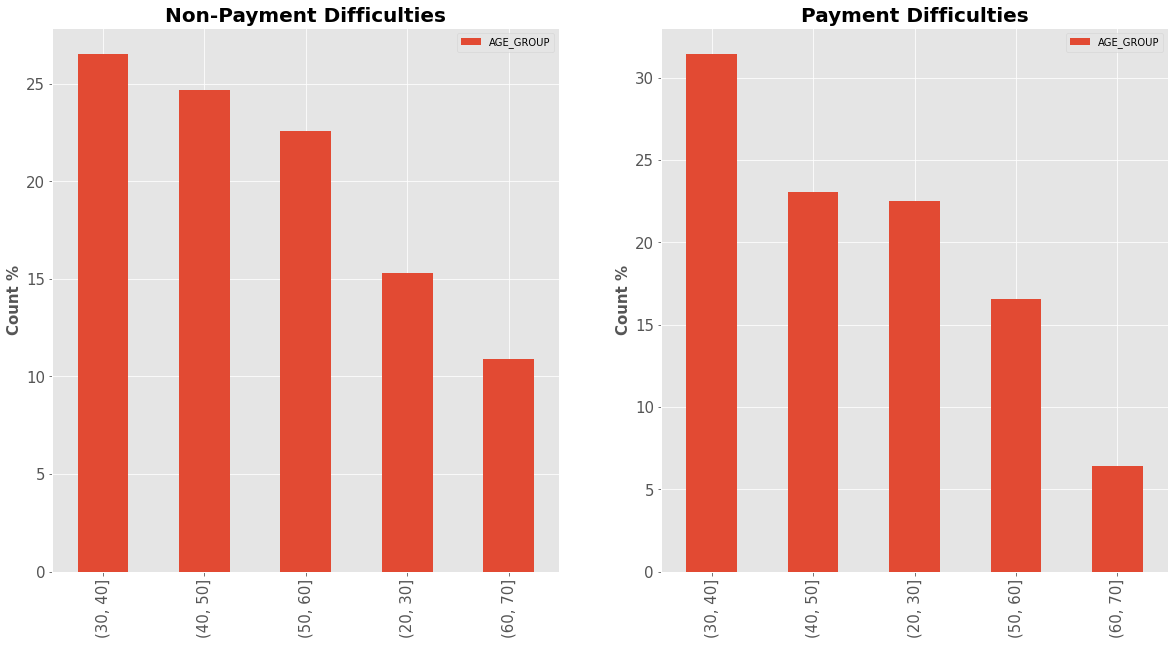

ANALYSIS OF INCOME_GROUPS


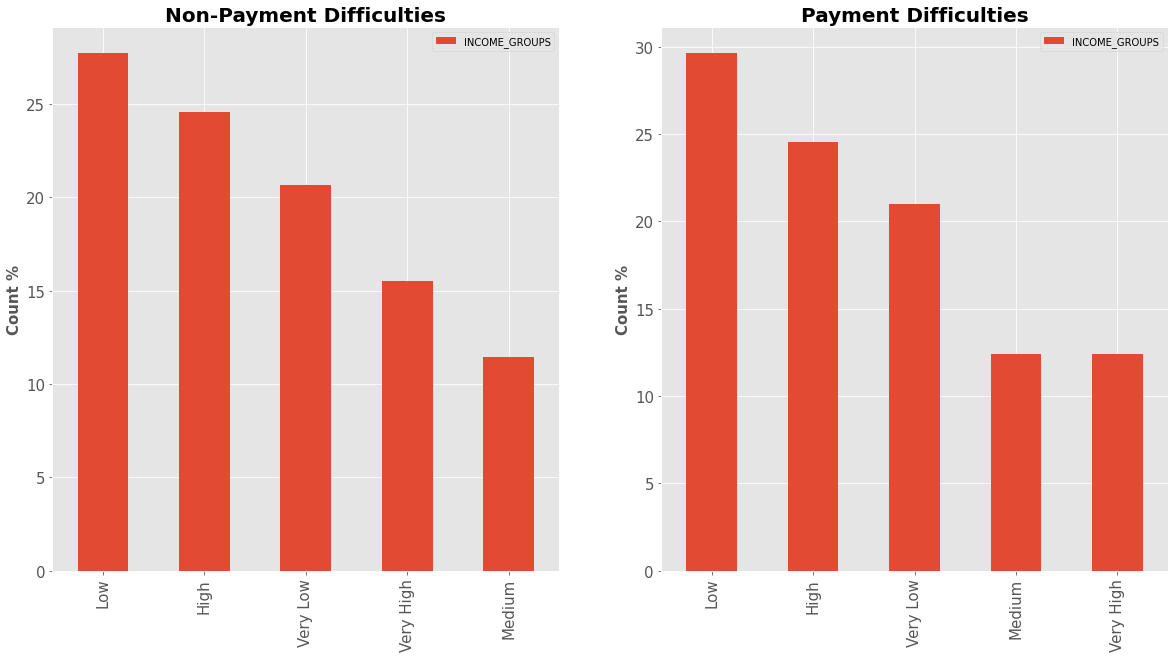

In [72]:
for col in cat_cols:     #Using for loop and custom defined function to do count analysis on categorical columns in one go.
    uni_seg_analysis(col)

Observations:
- NAME_CONTRACT_TYPE, FLAG_OWN_REALITY & NAME_TYPE SUITE : All these variable have no significant difference in payment and non-payment difficulties category.
- CODE_GENDER : Percentage of Male clients is more for Payment difficulties category in comparison with Non-Payment difficulties.
- FLAG_OWN_CAR : There is a slight increase in Payment Difficulties who don't own a car.
- NAME_INCOME_TYPE : There is almost 10% increase in payment difficulties category for working class clients.
- NAME_EDUCATION_TYPE : Increase in percentage of secondary Education type client in Payment Difficulties Category.
- NAME_FAMILY_STATUS : Slight increase in not married/single type for payment difficulties category.
- OCCUPATION TYPE : There is a significant increase in client with Laborers occupation type who have difficulties in paying loan.
- AGE_GROUP : (30-40) Age group people have a bit higher difficulty in paying loan while (60-70) age group people have lesser difficulty in paying their loans.
- INCOME_GROUPS : People with very high salary have lesser difficulties in paying their loan but most number of people who go for loan are people with low salary.

### Analysis of Numerical Columns:

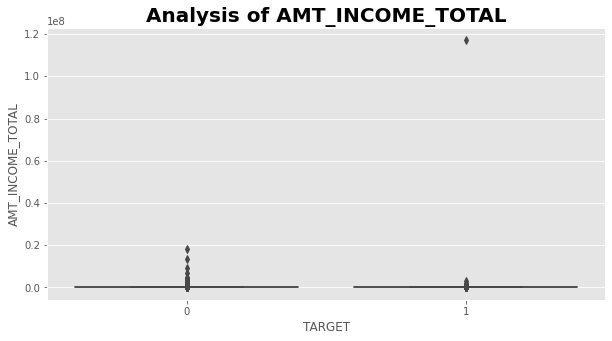

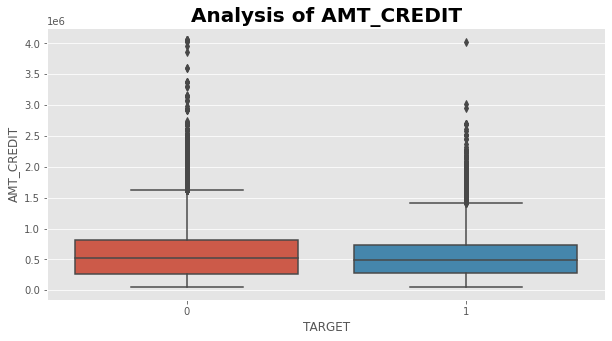

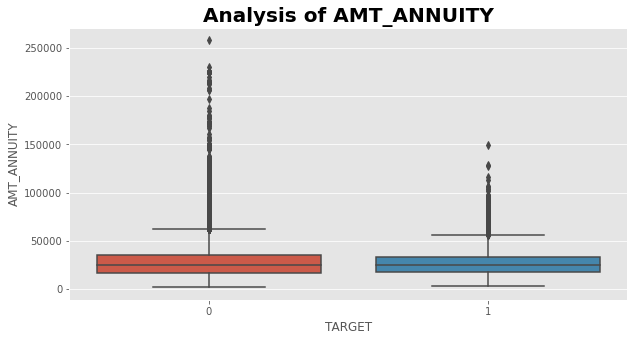

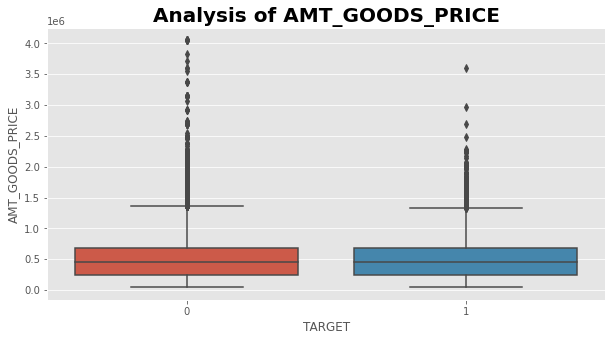

In [73]:
#Plotting Box plot:
for col in num_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df0,x="TARGET",y=col)
    plt.title(f"Analysis of {col}",fontsize=20, fontweight="bold")
    plt.show()

`Except for outliers we can see that the spread of the data is almost the same for both Non-Payment difficulties(0) and Payment difficulties(1).`

Analysis of AMT_INCOME_TOTAL


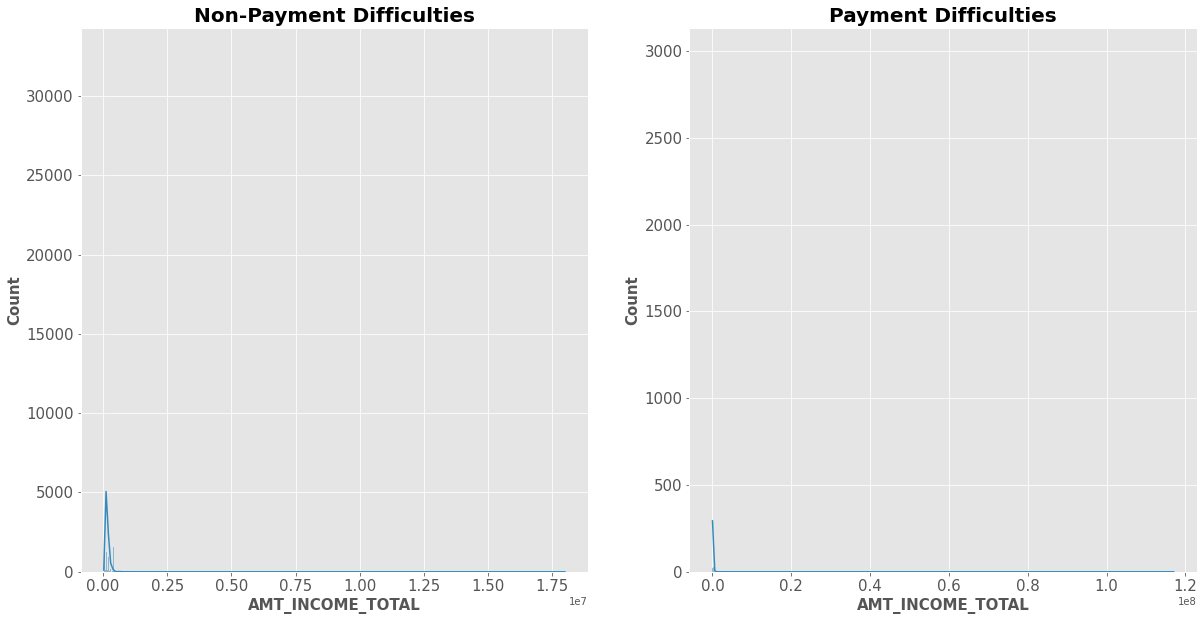

Analysis of AMT_CREDIT


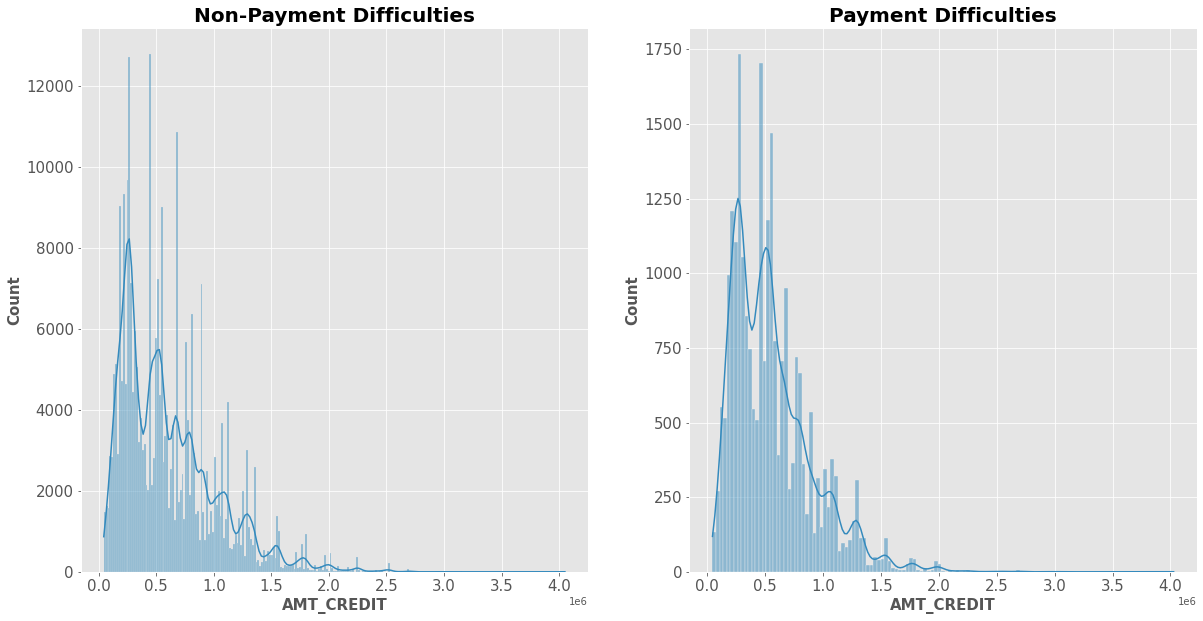

Analysis of AMT_ANNUITY


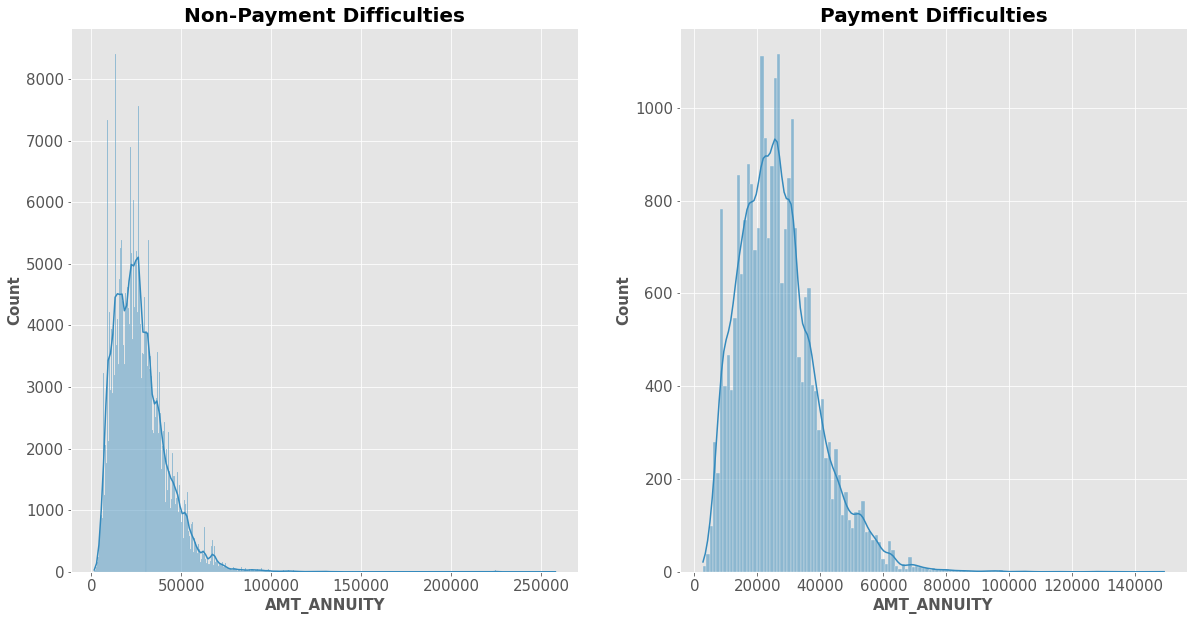

Analysis of AMT_GOODS_PRICE


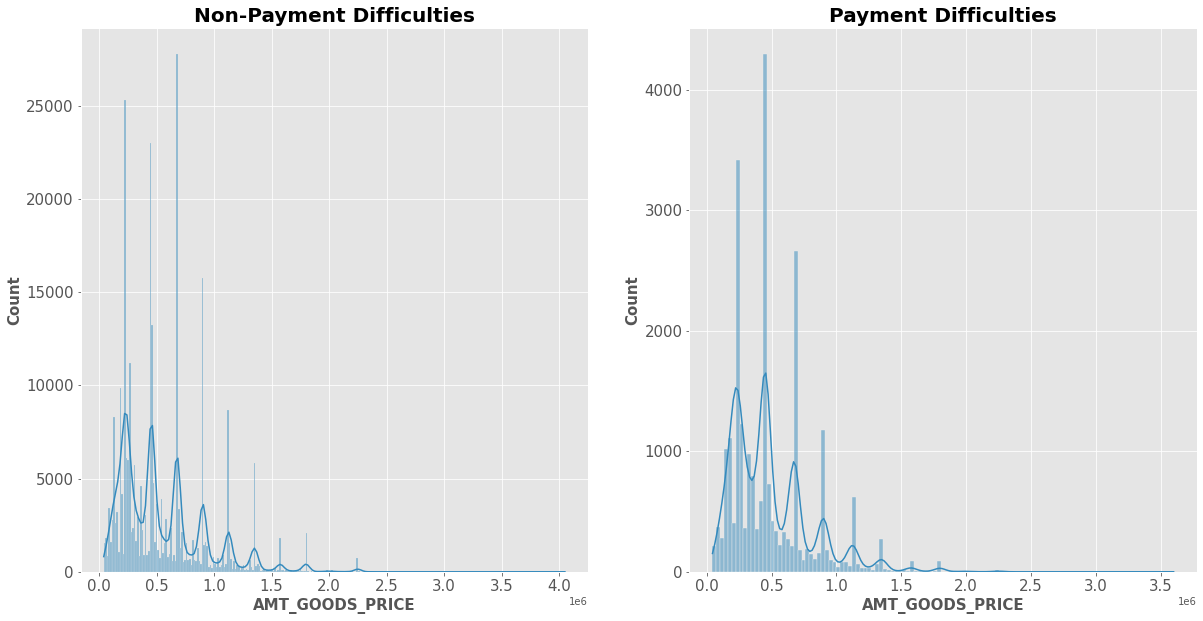

In [74]:
#Plotting Histogram:
for i in num_cols:
    
    print(f"Analysis of {i}")
    
    plt.figure(figsize=(20,10))
    
    plt.subplot(1,2,1)
    sns.histplot(t0[i], kde=True)
    plt.title("Non-Payment Difficulties",fontsize= 20, fontweight="bold")
    plt.xlabel(i, fontsize= 15, fontweight="bold")
    plt.ylabel("Count", fontsize= 15, fontweight="bold")
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 15)
    plt.yscale('linear')
    
    plt.subplot(1,2,2)
    sns.histplot(t1[i], kde=True)
    plt.title("Payment Difficulties",fontsize= 20, fontweight="bold")
    plt.xlabel(i, fontsize= 15, fontweight="bold")
    plt.ylabel("Count", fontsize= 15, fontweight="bold")
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 15)
    plt.yscale('linear')
    
    plt.show()

`Except for AMT_ANNUITY variable all variable have similar spread in data for both Payment diffculties and Non-Payment Difficulties, while for AMT_ANNUITY payment difficulties have higher spread.`

## E) Bivariate Analysis:

In [75]:
#Making a correlation matrix for each target category:

corr0=t0.corr()             #For Non-Payment Difficulties category
corr_df = corr0.where(np.triu(np.ones(corr0.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Col1','Col2','Correlation for Non-Payment Difficulties']
corr_df.dropna(subset=['Correlation for Non-Payment Difficulties'],inplace=True)
corr_df = corr_df.sort_values(by=['Correlation for Non-Payment Difficulties'], ascending=False)
corr_df.head(10)


Col1                        Col2  \
3790                      Age_yrs                  DAYS_BIRTH   
2014     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE   
376               AMT_GOODS_PRICE                  AMT_CREDIT   
1259  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT   
1118              CNT_FAM_MEMBERS                CNT_CHILDREN   
1511  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION   
2077     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE   
1700      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY   
377               AMT_GOODS_PRICE                 AMT_ANNUITY   
314                   AMT_ANNUITY                  AMT_CREDIT   

      Correlation for Non-Payment Difficulties  
3790                                  0.999706  
2014                                  0.998511  
376                                   0.987021  
1259                                  0.949979  
1118                                  0.878661  
1511                                  0.861653  
2077                                  0.859469  
1700                                  0.830417  
377                                   0.775593  
314                                   0.770567

In [76]:
corr1=t1.corr()             #For Payment Difficulties category
corr_df = corr1.where(np.triu(np.ones(corr1.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Col1','Col2','Correlation for Payment Difficulties']
corr_df.dropna(subset=['Correlation for Payment Difficulties'],inplace=True)
corr_df = corr_df.sort_values(by=['Correlation for Payment Difficulties'], ascending=False)
corr_df.head(10)

Col1                        Col2  \
3790                      Age_yrs                  DAYS_BIRTH   
2014     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE   
376               AMT_GOODS_PRICE                  AMT_CREDIT   
1259  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT   
1118              CNT_FAM_MEMBERS                CNT_CHILDREN   
2077     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE   
1511  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION   
1700      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY   
377               AMT_GOODS_PRICE                 AMT_ANNUITY   
314                   AMT_ANNUITY                  AMT_CREDIT   

      Correlation for Payment Difficulties  
3790                              0.999680  
2014                              0.998272  
376                               0.982775  
1259                              0.956560  
1118                              0.885497  
2077                              0.869806  
1511                              0.847846  
1700                              0.778572  
377                               0.751912  
314                               0.751707

### Categorical vs Categorical Analysis:

In [77]:
#define a custom fucntion to plot categorical vs categorical columns:

def catvscat(col1,col2):
     print(f"Analysis of {col1} vs {col2}")
    
     plt.figure(figsize=(20,10))
     
     plt.subplot(1,2,1)
     sns.countplot(data=t0,x=col1, hue=col2)
     plt.title("Non-Payment Difficulties",fontsize= 20, fontweight="bold")
     plt.xlabel(col1, fontsize= 15, fontweight="bold")
     plt.ylabel("Count", fontsize= 15, fontweight="bold")
     plt.xticks(fontsize= 15, rotation = 90)
     plt.yticks(fontsize= 15)
     plt.yscale('linear')
     
     plt.subplot(1,2,2)
     sns.countplot(data=t1,x=col1, hue=col2)
     plt.title("Payment Difficulties",fontsize= 20, fontweight="bold")
     plt.xlabel(col1, fontsize= 15, fontweight="bold")
     plt.ylabel("Count", fontsize= 15, fontweight="bold")
     plt.xticks(fontsize= 15, rotation = 90)
     plt.yticks(fontsize= 15)
     plt.yscale('linear')
     
     plt.show()

In [78]:
#Checking our important categorical columns to select for the plotting of chart:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'AGE_GROUP',
 'INCOME_GROUPS']

Analysis of AGE_GROUP vs INCOME_GROUPS


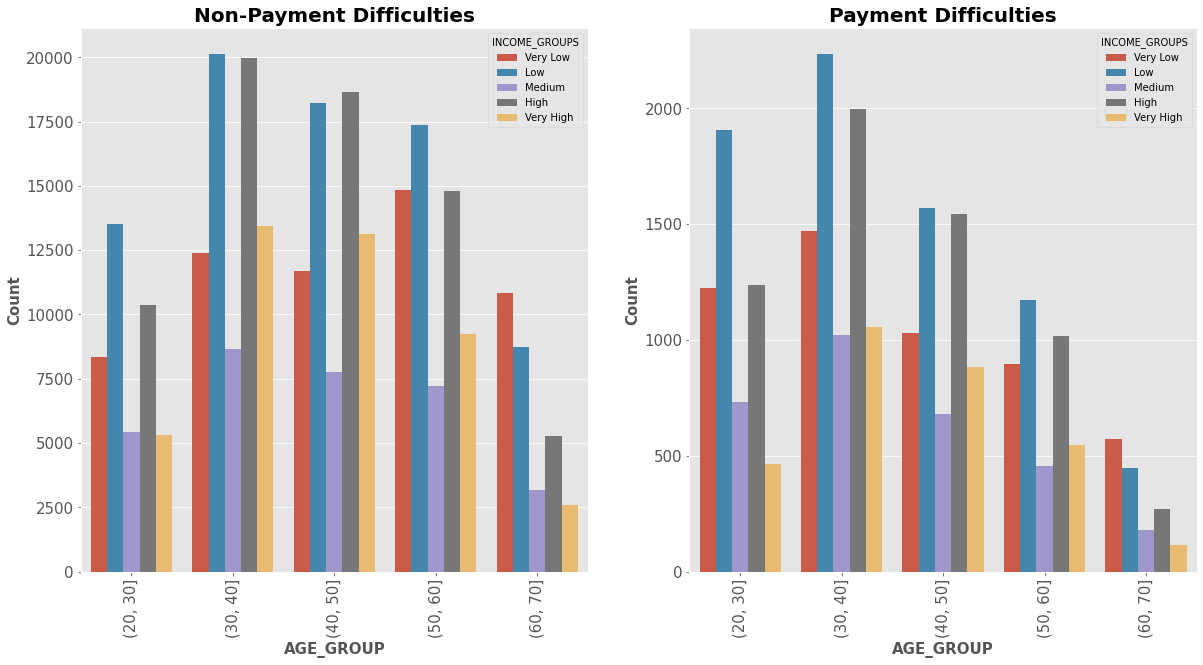

In [79]:
catvscat("AGE_GROUP","INCOME_GROUPS")

`Observation : Age group (30-40) is the riskiest age group but after this the graph takes a dip as we move on towards age group(60-70) as it is the least risk of being a payment default.`

Analysis of AGE_GROUP vs CODE_GENDER


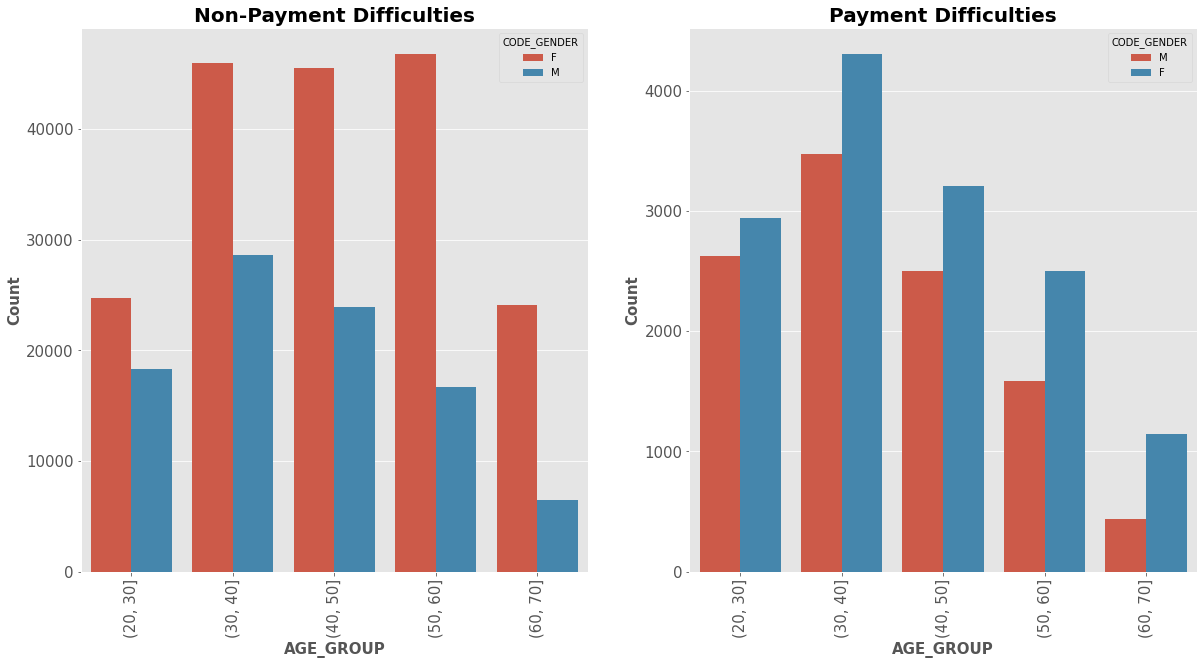

In [80]:
catvscat("AGE_GROUP","CODE_GENDER")

`Observation : We can see that female gender is the most defaulter but with increasing age we can see the decreasing trend in payment difficulties categories.`

Analysis of WEEKDAY_APPR_PROCESS_START vs CODE_GENDER


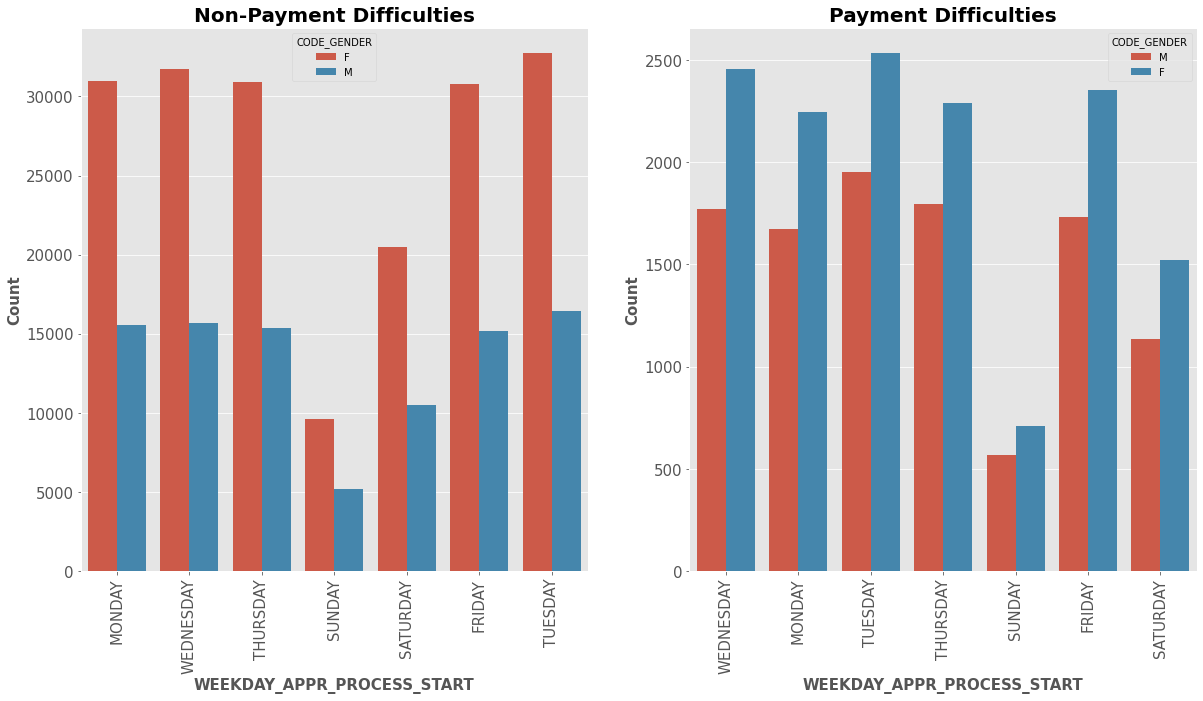

In [81]:
catvscat("WEEKDAY_APPR_PROCESS_START","CODE_GENDER")

`Observation : Both the plot have similar characteristics.`

Analysis of NAME_INCOME_TYPE vs CODE_GENDER


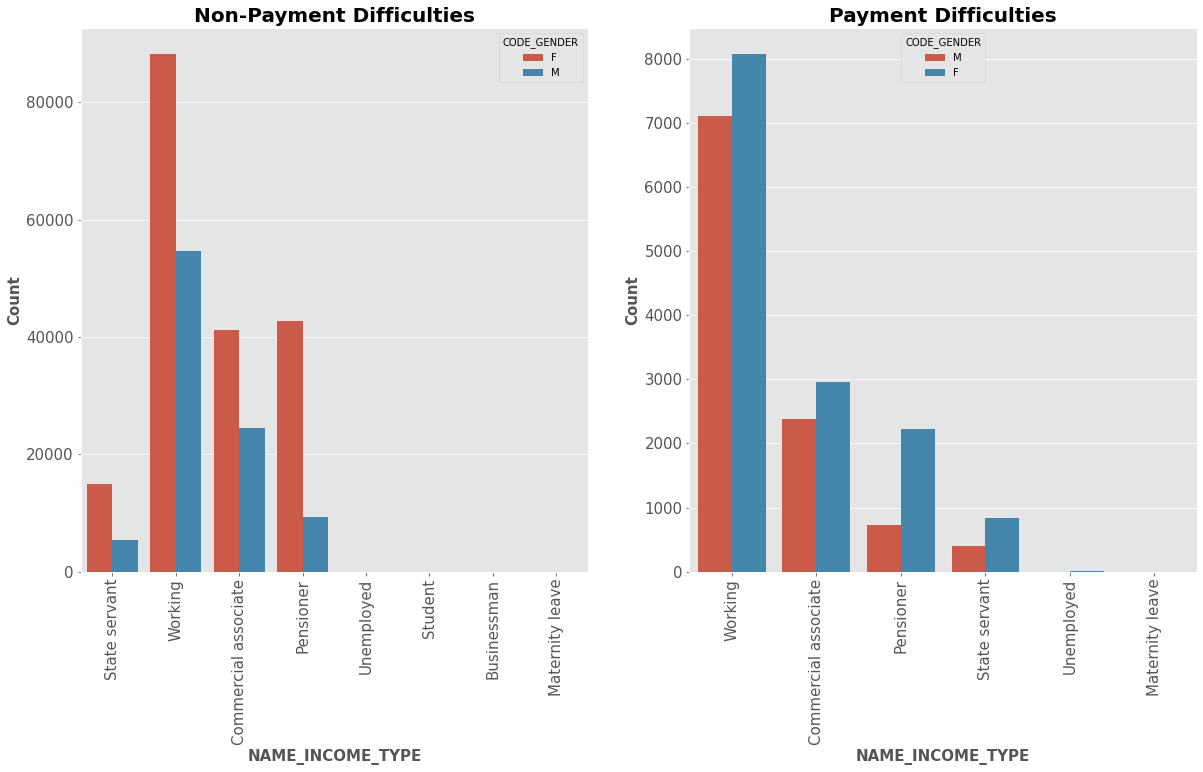

In [82]:
catvscat("NAME_INCOME_TYPE","CODE_GENDER")

`Observation : We can see that there is a increase in working male defaulter category and we can see the sharp drop in persioner category.`

Analysis of OCCUPATION_TYPE vs CODE_GENDER


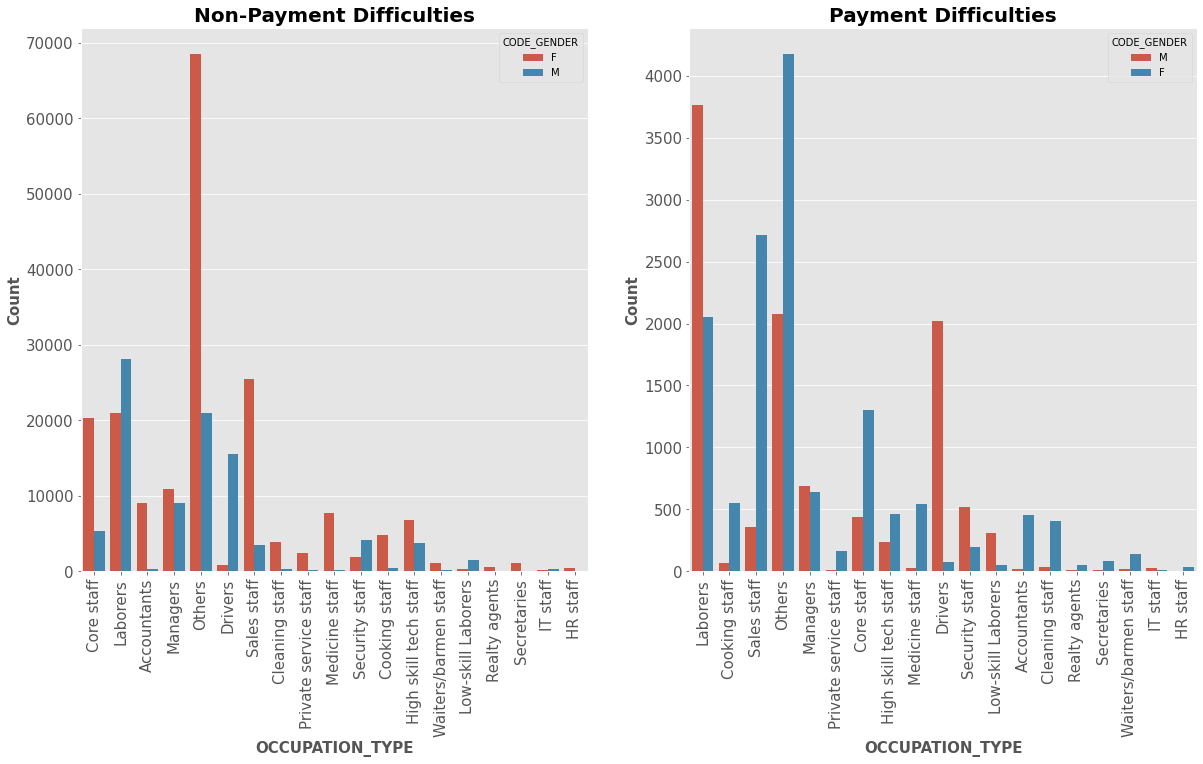

In [83]:
catvscat("OCCUPATION_TYPE","CODE_GENDER")

`Observation : We can see the sharp increase in laborers category in payment default category and also male laborer have most difficulties in paying loan.`

Analysis of NAME_EDUCATION_TYPE vs CODE_GENDER


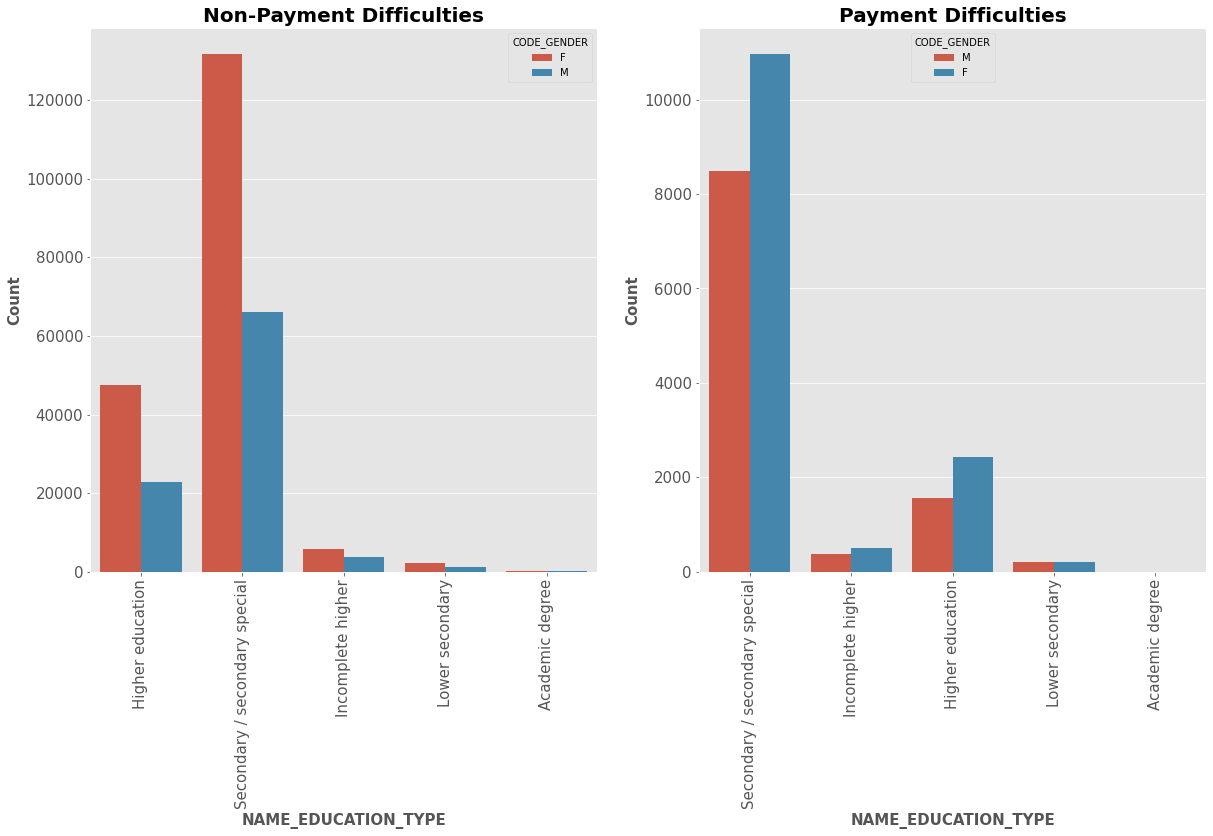

In [84]:
catvscat("NAME_EDUCATION_TYPE","CODE_GENDER")

`Observation : Female with the Secondary Education are the most defaulter.`

Analysis of NAME_EDUCATION_TYPE vs NAME_FAMILY_STATUS


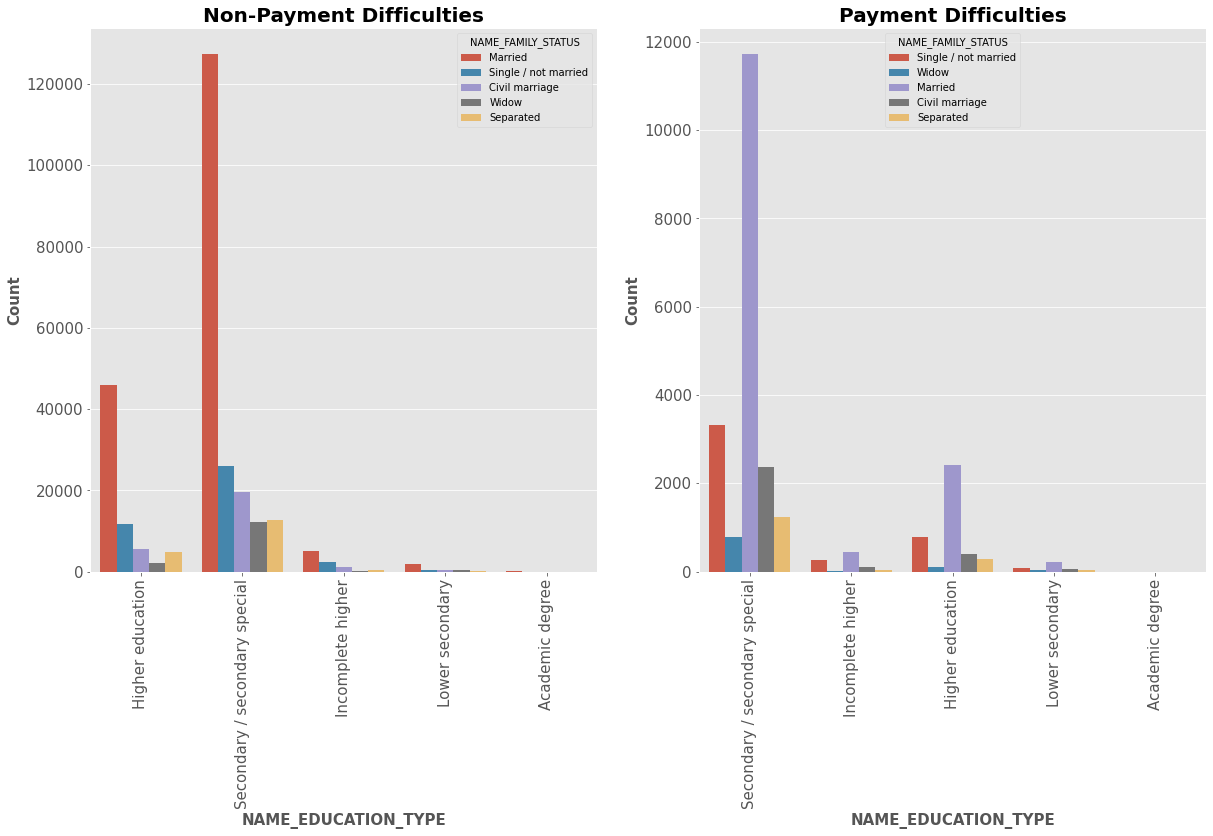

In [85]:
catvscat("NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS")

`Observation : Client with married marital status and secondary education is at most risk of being a defaulter.`

### Categorical vs Numerical Analysis:


In [86]:
#define a custom fucntion to plot categorical vs numerical columns:

def catvsnum(col1,col2):
     print(f"Analysis of {col1} vs {col2}")
    
     plt.figure(figsize=(20,10))
     
     plt.subplot(1,2,1)
     sns.barplot(data=t0,x=col1, y=col2, ci=None, estimator=np.mean)
     plt.title("Non-Payment Difficulties",fontsize= 20, fontweight="bold")
     plt.xlabel(col1, fontsize= 15, fontweight="bold")
     plt.ylabel(col2, fontsize= 15, fontweight="bold")
     plt.xticks(fontsize= 15, rotation = 90)
     plt.yticks(fontsize= 15)
     plt.yscale('linear')
     
     plt.subplot(1,2,2)
     sns.barplot(data=t1,x=col1, y=col2, ci=None, estimator=np.mean)
     plt.title("Payment Difficulties",fontsize= 20, fontweight="bold")
     plt.xlabel(col1, fontsize= 15, fontweight="bold")
     plt.ylabel(col2, fontsize= 15, fontweight="bold")
     plt.xticks(fontsize= 15, rotation = 90)
     plt.yticks(fontsize= 15)
     plt.yscale('linear')
     
     plt.show()

Analysis of NAME_EDUCATION_TYPE vs AMT_CREDIT


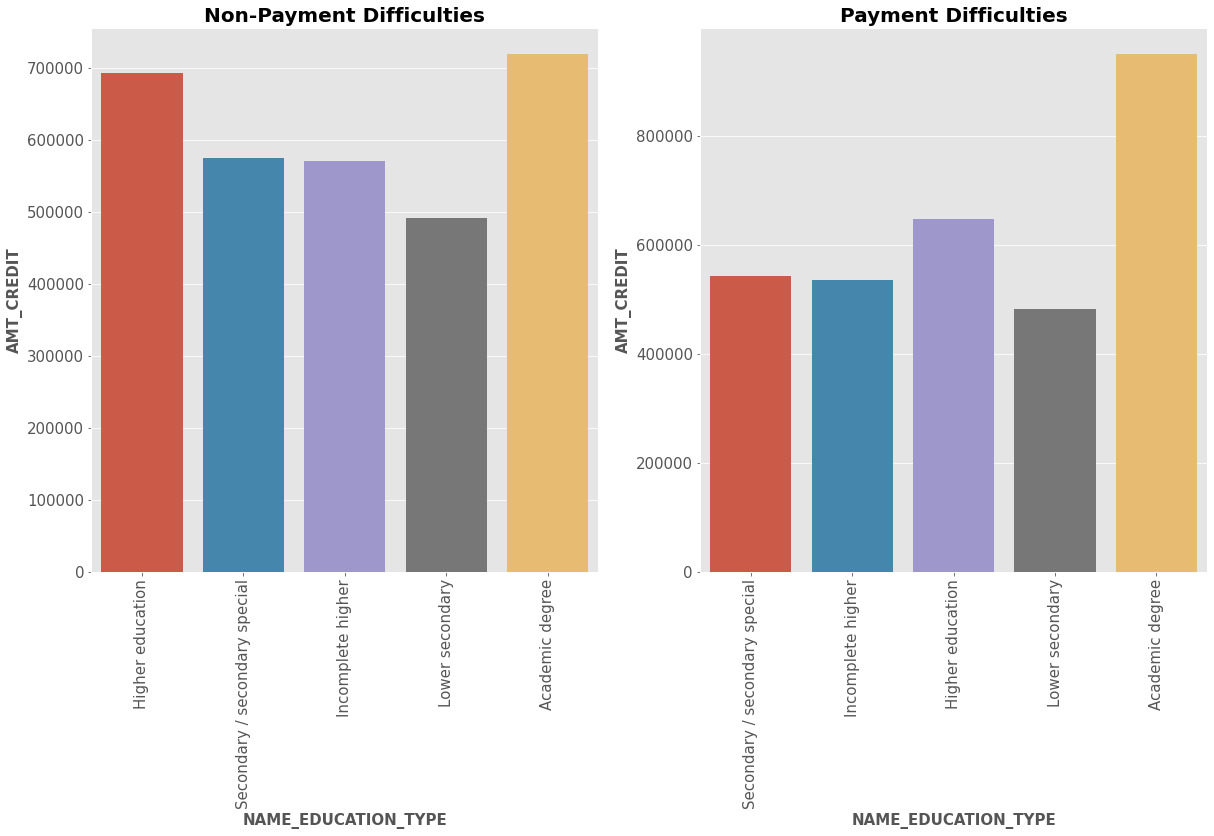

In [87]:
catvsnum("NAME_EDUCATION_TYPE","AMT_CREDIT")

`Observation : Client with education level Academic degree with a loan amount of 800k and higher are most likely to deafault.`

Analysis of NAME_EDUCATION_TYPE vs CNT_CHILDREN


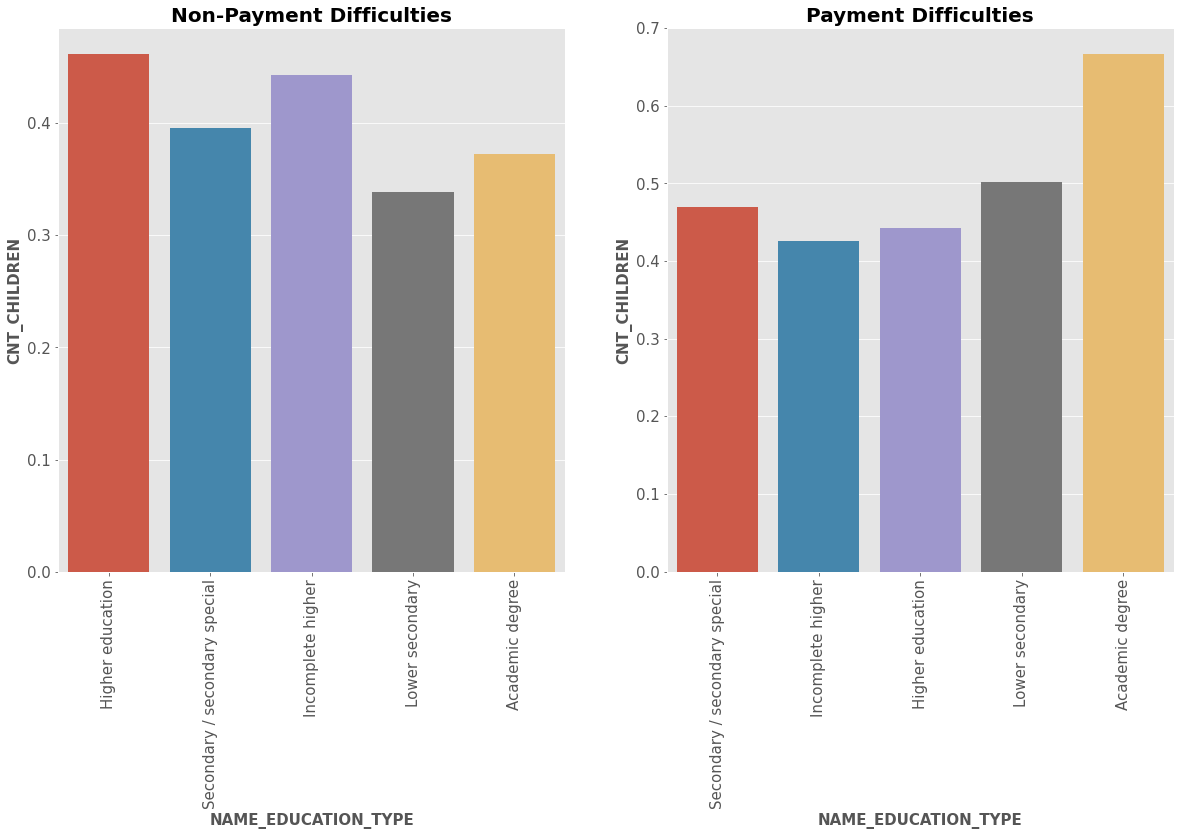

In [88]:
catvsnum("NAME_EDUCATION_TYPE","CNT_CHILDREN")

`Observation : Higher education client is least like to default on their loan.`

Analysis of NAME_FAMILY_STATUS vs CNT_CHILDREN


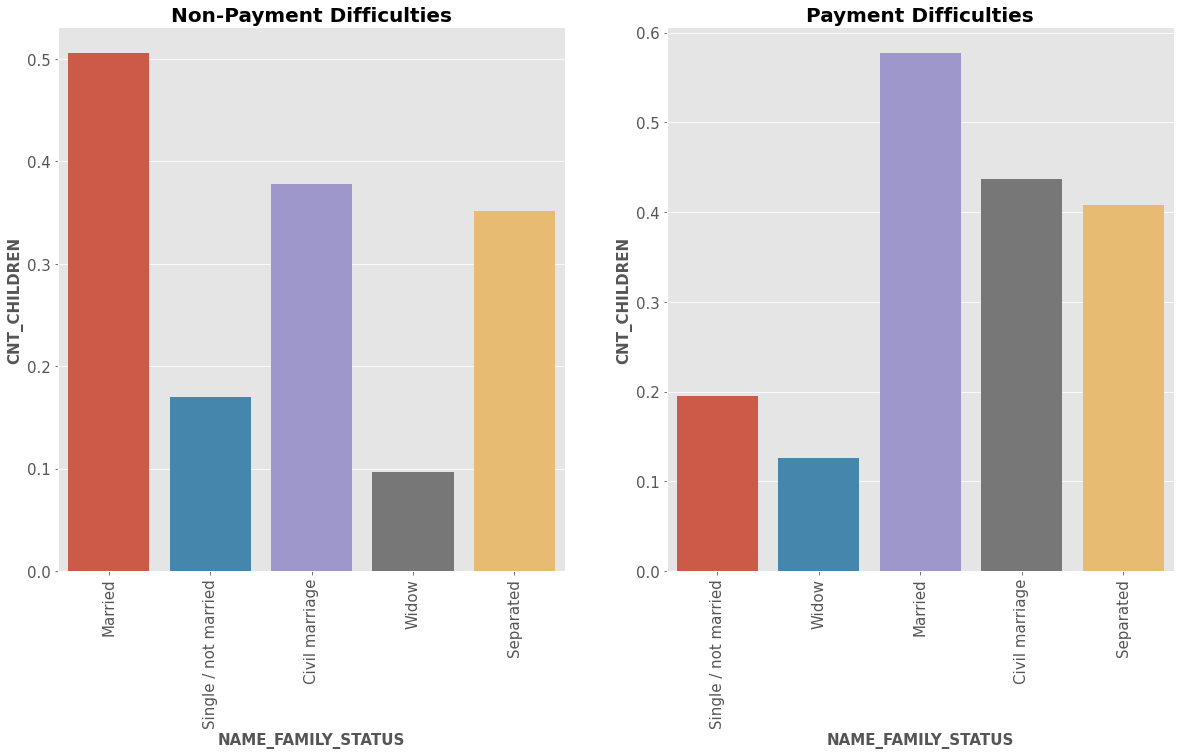

In [89]:
catvsnum("NAME_FAMILY_STATUS","CNT_CHILDREN")

`Observation : There is not much difference between the two chart.`

### Numerical vs Numerical Analysis: 

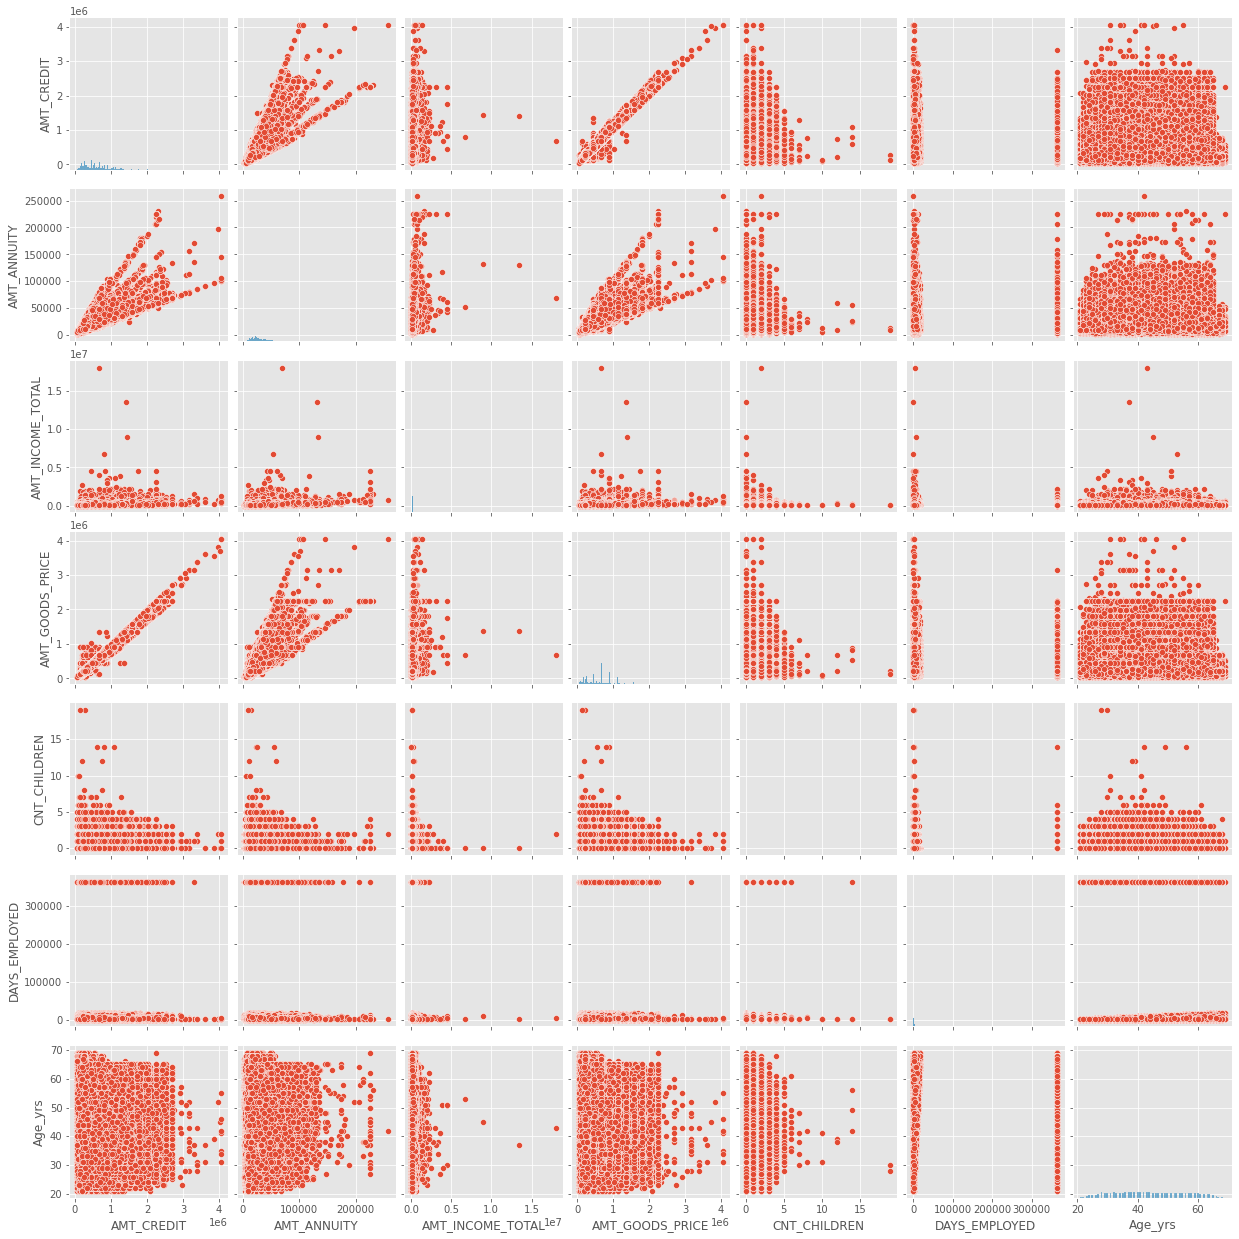

In [90]:
#Plotting the pair plot for Non-Payment difficulties category: 
sns.pairplot(t0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'CNT_CHILDREN','DAYS_EMPLOYED', 'Age_yrs']])
plt.show()

`Observation : AMT_ANNUITY, AMT_CREDIT and AMT_GOODS_PRICE share a directly proportional relation.`

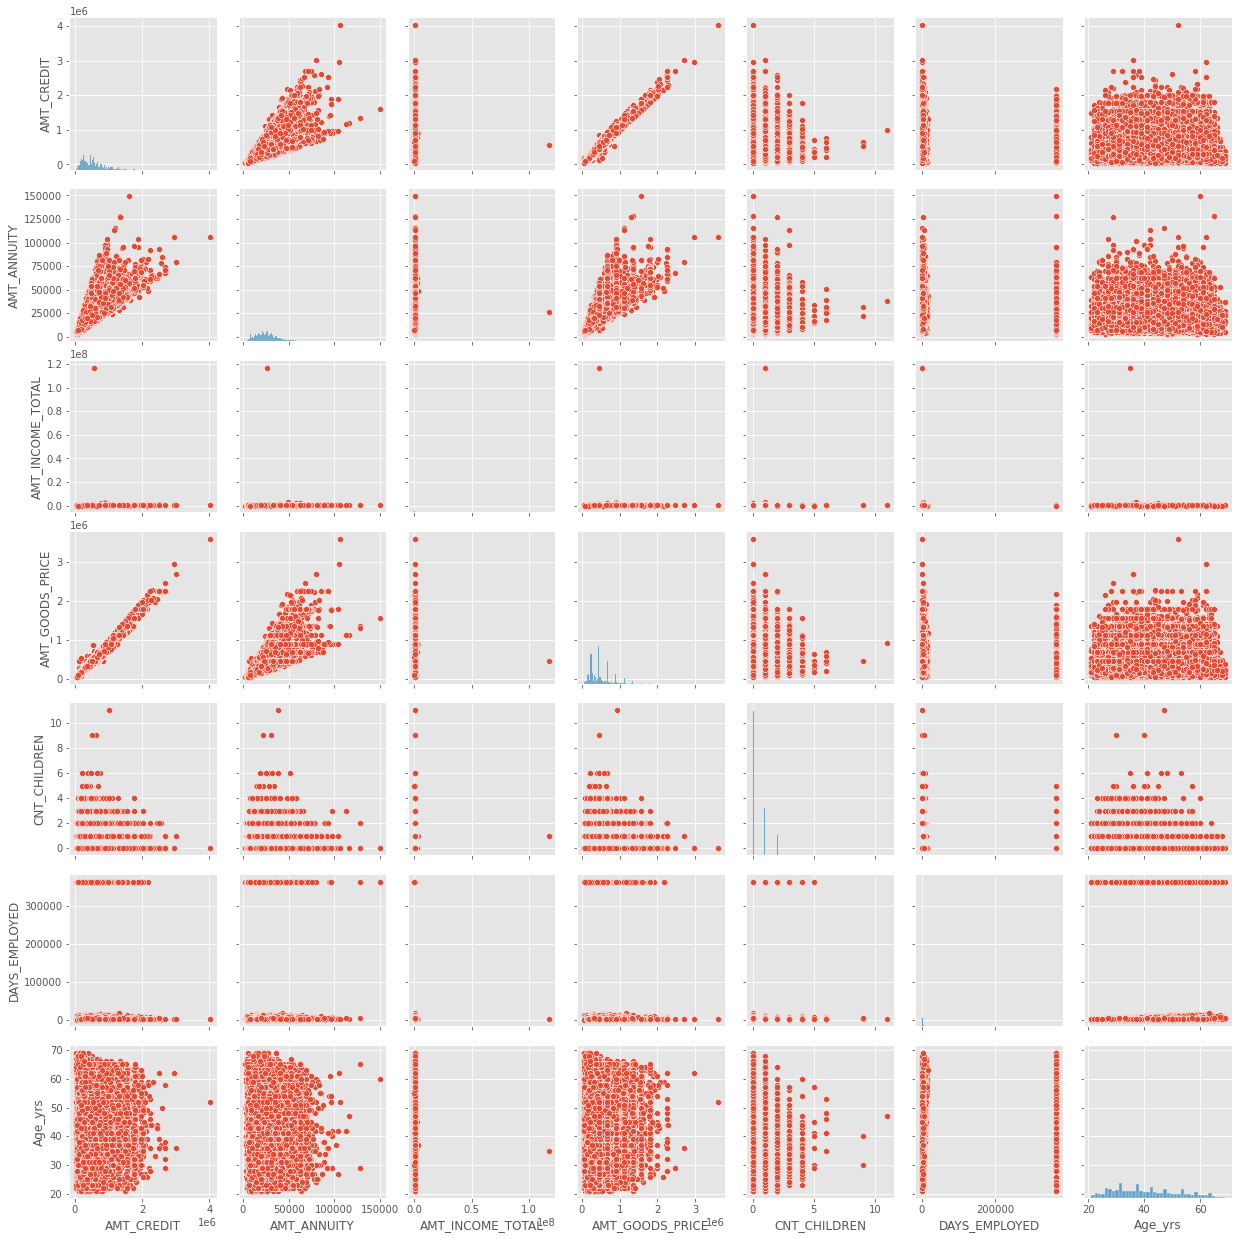

In [91]:
#Plotting the pair plot for Payment difficulties category: 
sns.pairplot(t1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'CNT_CHILDREN','DAYS_EMPLOYED', 'Age_yrs']])
plt.show()

`This also follow the similar relation as above for non defaulter ones.`

In [92]:
#Definig a function for heatmap:
def target_corr(data, title):
    plt.figure(figsize=(15,10))
    mask = np.zeros_like(data)
    mask[np.triu_indices_from(mask)]=True
    with sns.axes_style("white"):
        ax=sns.heatmap(data,cmap="Greens",mask=mask)
    plt.title(title,fontsize=30, pad=20)

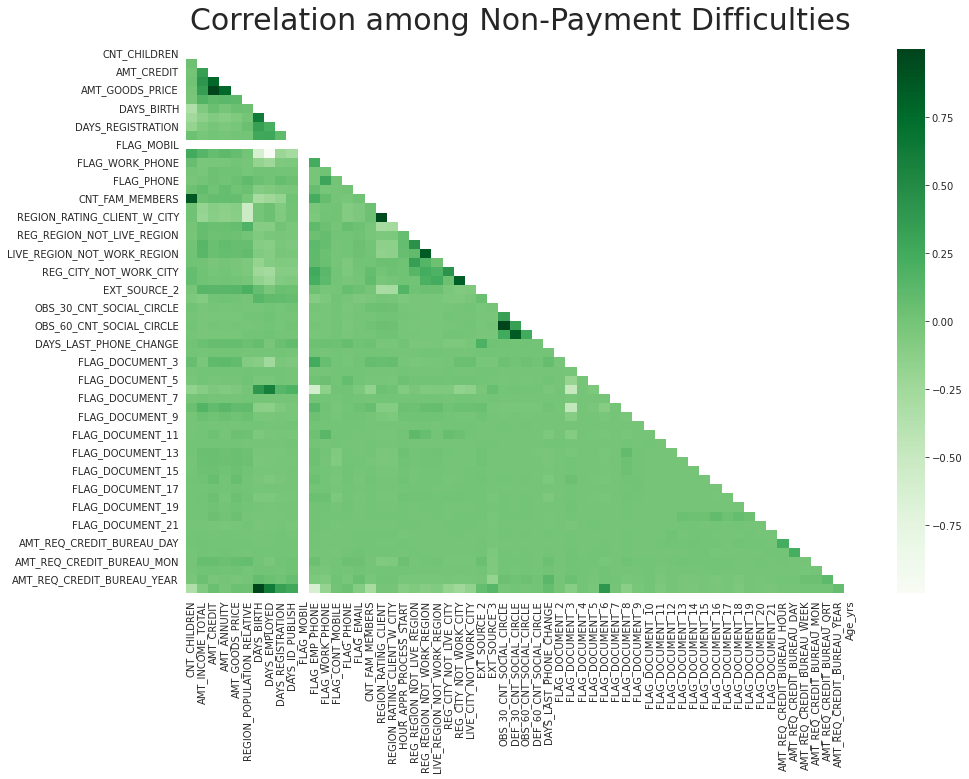

In [93]:
#Heatmap for Non-Payment Difficulties:
corr0=t0.iloc[0:,2:]
target_corr(data=corr0.corr(),title='Correlation among Non-Payment Difficulties')

plt.show()

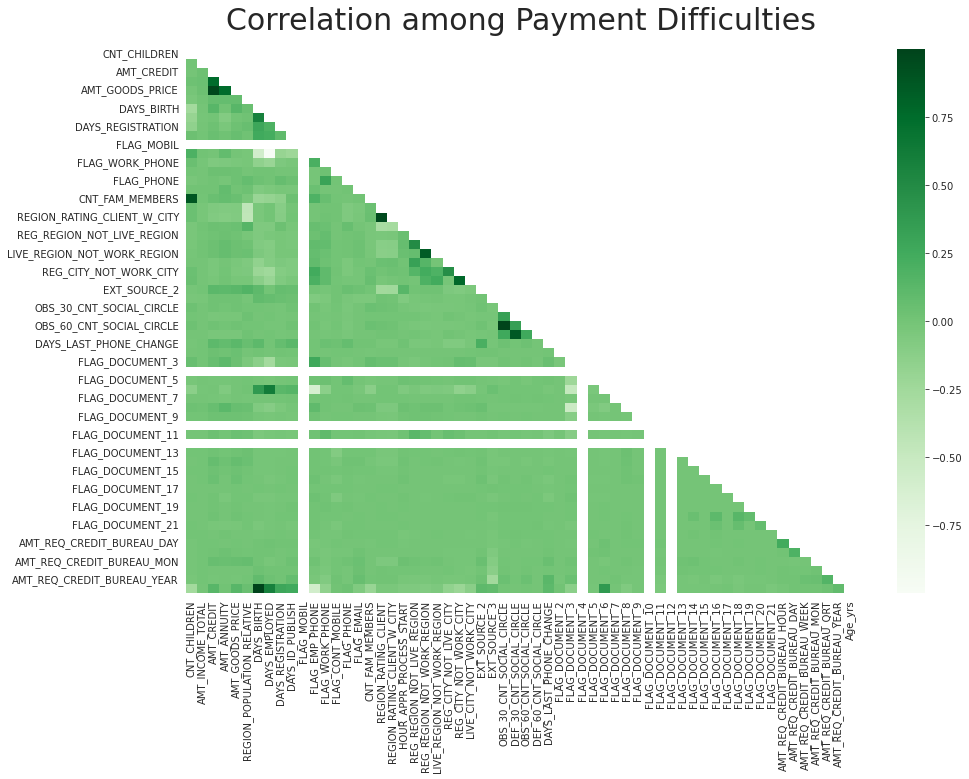

In [94]:
#Heatmap for Non-Payment Difficulties:
corr1=t1.iloc[0:,2:]
target_corr(data=corr1.corr(),title='Correlation among Payment Difficulties')

plt.show()

Obseravtion: Following Variables have high correlation in both Non-payment difficulties and Payment Difficulties:
- AMT_GOODS_PRICE and AMT_CREDIT
- AMT_ANNUITY and AMT_CREDIT
- AMT_ANNUITY and AMT_GOODS_PRICE
- CNT_FAM_MEMBERS and CNT_CHILDREN

## F) Analysis of PREVIOUS_APPLICATION Dataset:

In [95]:
#Checking head of data:
df1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [96]:
#Checking dtypes:
df1.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [97]:
#Checking shape of data:
df1.shape

(1670214, 37)

In [98]:
#Checking info the data:
df1.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [99]:
#Checking no of unique value in each columns:
df1.nunique()

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357959
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
AMT_DOWN_PAYMENT                 29278
AMT_GOODS_PRICE                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
RATE_DOWN_PAYMENT               207033
RATE_INTEREST_PRIMARY              148
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      7
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE             

In [100]:
#Checking missing value percent in each column:
df1.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

### Data Cleaning:

In [101]:
#Drop the columns who have null values percentage greater than 40% :
print("The shape before dropping the columns:", df1.shape)

cols = (df1.isnull().mean()*100)

df1.drop(cols[cols>40].keys(), axis=1, inplace=True)

print("The shape after dropping the columns:", df1.shape)

The shape before dropping the columns: (1670214, 37)
The shape after dropping the columns: (1670214, 26)


In [102]:
#Identifying missing values:
null_values = df1.isnull().sum()
null_values[null_values > 0]

AMT_ANNUITY            372235
AMT_CREDIT                  1
AMT_GOODS_PRICE        385515
CNT_PAYMENT            372230
PRODUCT_COMBINATION       346
dtype: int64

`We can impute the missing values of these columns with mean/median of numerical columns and mode for categorical if the missing value percentage is not very high to create a biasing if prone to biasing we can just impute it with 'unknown'.`

In [103]:
df1.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

In [104]:
#Function for faster plotting of boxplot:
def box_plot(column_name):
    plt.style.use('ggplot')
    sns.boxplot(df1[column_name])
    plt.title(f'Analysis of {column_name}')
    plt.show()

In [105]:
#Seperating numerical columns and categorical columns:
df1_num_cols = list(df1.select_dtypes(include=['int64', 'float64']).columns)    #Numerical columns
df1_cat_cols = list(df1.select_dtypes(include=['object']).columns)              #Categorical Columns

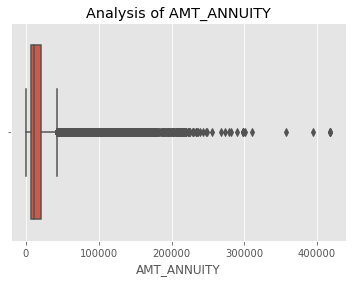

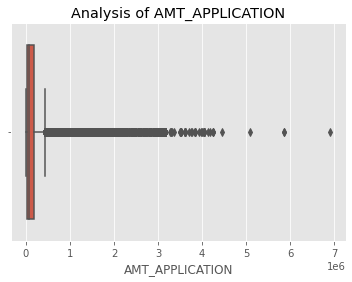

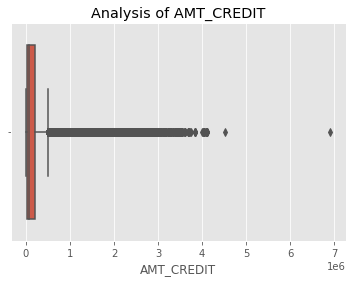

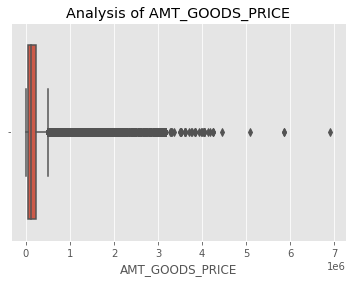

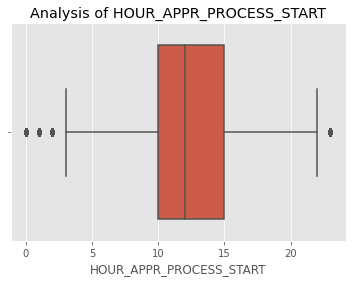

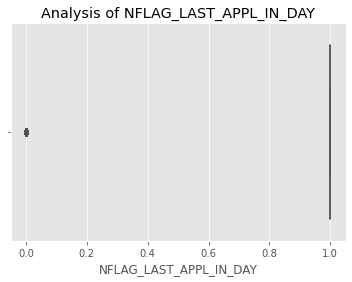

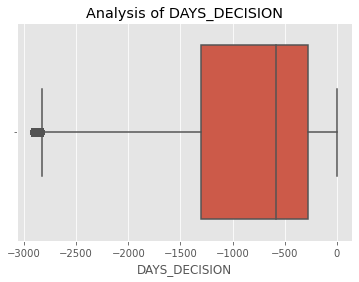

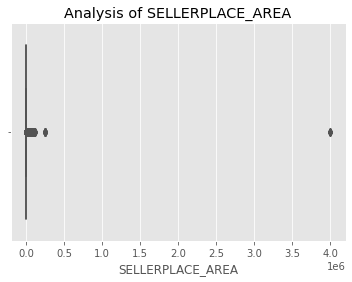

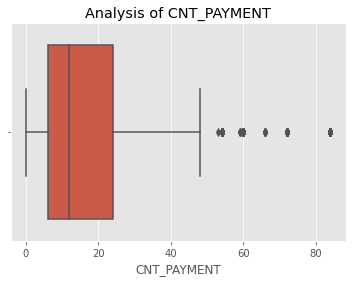

In [106]:
#Plotting box plot for all numerical columns:

for i in df1_num_cols[2:]:
    box_plot(i)

`Observation : 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT','HOUR_APPR_PROCESS_START' all these columns have potential outliers.`

### Univariate Analysis(Previous Application):

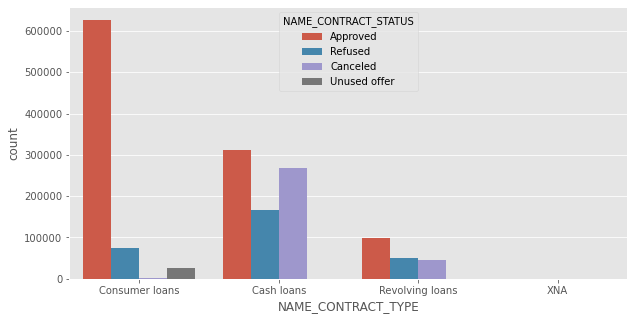

In [107]:
plt.figure(figsize=(10,5))
sns.countplot(data=df1,x="NAME_CONTRACT_TYPE",hue="NAME_CONTRACT_STATUS")
plt.show()

`Observation : Consumer loans have the highest no of counts and also their approval rating is also the highest.`

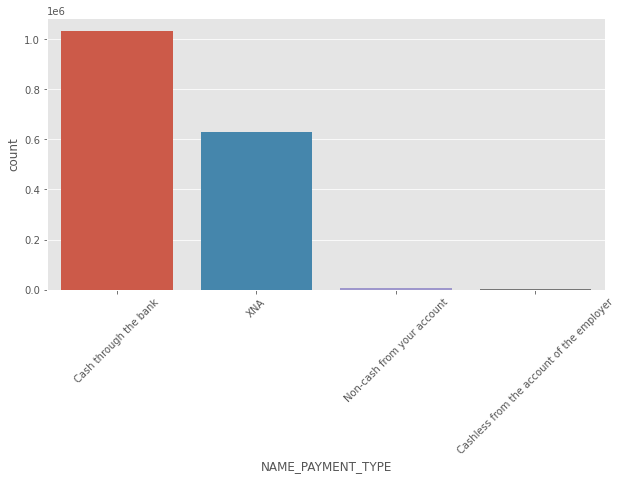

In [108]:
plt.figure(figsize=(10,5))
sns.countplot(data=df1,x="NAME_PAYMENT_TYPE")
plt.xticks(rotation=45)
plt.show()

`Observation : Most of the client used Cash through the bank mode, while cashless from the account is the least favourable.`

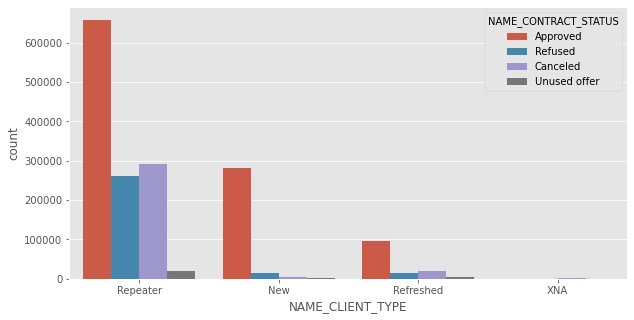

In [109]:
plt.figure(figsize=(10,5))
sns.countplot(data=df1,x="NAME_CLIENT_TYPE",hue="NAME_CONTRACT_STATUS")
plt.show()

`Observation : Repeater clients are the one who have the highest frequency among the name_client_type and also they have the highest approval rating.` 

In [110]:
#Getting top 10 correlation Previous Application
corr=df1.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['col1','col2','correlation']
corr_df.dropna(subset=['correlation'],inplace=True)
corr_df = corr_df.sort_values(by=['correlation'], ascending=False)
corr_df.head(10)

col1             col2  correlation
58   AMT_GOODS_PRICE  AMT_APPLICATION     0.999884
59   AMT_GOODS_PRICE       AMT_CREDIT     0.993087
47        AMT_CREDIT  AMT_APPLICATION     0.975824
57   AMT_GOODS_PRICE      AMT_ANNUITY     0.820895
46        AMT_CREDIT      AMT_ANNUITY     0.816429
35   AMT_APPLICATION      AMT_ANNUITY     0.808872
113      CNT_PAYMENT  AMT_APPLICATION     0.680630
114      CNT_PAYMENT       AMT_CREDIT     0.674278
115      CNT_PAYMENT  AMT_GOODS_PRICE     0.672129
112      CNT_PAYMENT      AMT_ANNUITY     0.394535

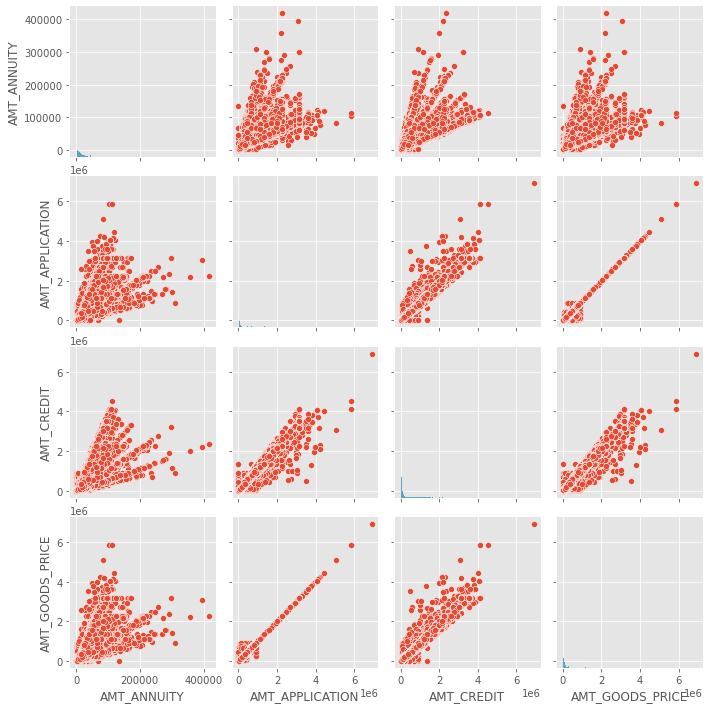

In [111]:
#Plotting the pair plot for the above highest correlation variables:
sns.pairplot(df1[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']])
plt.show()

Observation: 
- AMT_GOODS_PRICE have a directly proportional relation with AMT_APPLICATION and AMT_CREDIT.
- Credit amount client asked on the previous application and Goods price of goods that clients mentioned on previous application.

### Bivariate Analysis(Previous Application):

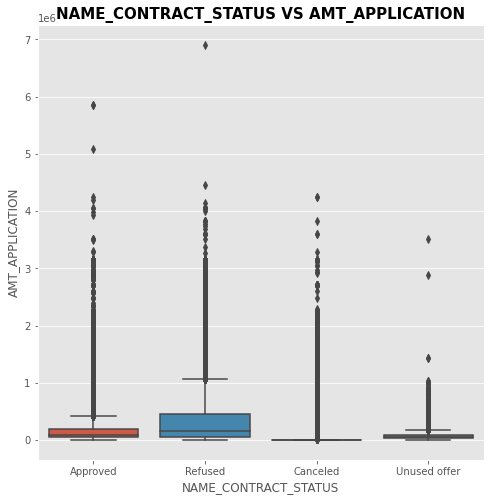

In [112]:
#plotting a boxplot to analyse AMT_APPLICATION:
plt.figure(figsize=(8,8))
sns.boxplot(data=df1,x='NAME_CONTRACT_STATUS', y='AMT_APPLICATION')
plt.title("NAME_CONTRACT_STATUS VS AMT_APPLICATION",fontsize=15,fontweight="bold")
plt.show()

`Observaiton : Client with high AMT_APPICATION mostly got their application cancelled or rejected.`

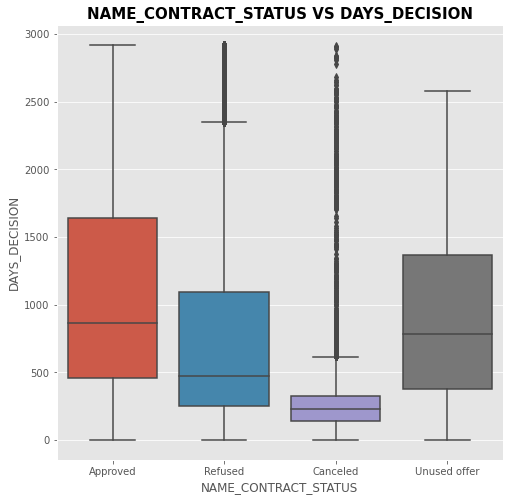

In [113]:
#Changing the DAYS_DECISION column it contains negative values:
df1["DAYS_DECISION"] = df1["DAYS_DECISION"].abs()

#Plotting the box plot for the analysis:
plt.figure(figsize=(8,8))
sns.boxplot(data=df1,x='NAME_CONTRACT_STATUS', y='DAYS_DECISION')
plt.title("NAME_CONTRACT_STATUS VS DAYS_DECISION",fontsize=15,fontweight="bold")
plt.show()

`Observation : Bank takes large number of days to approve a loan in comparison with to cancelling or refusing a loan.` 

In [114]:
#Checking head of the data:
df1.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   
5    340573.5         315000.0                   SATURDAY   
6         0.0              NaN                    TUESDAY   
7         0.0              NaN                     MONDAY   
8         0.0              NaN                     MONDAY   
9         0.0              NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   
5                        8                           Y   
6                       11                           Y   
7                        7                           Y   
8                       15                           Y   
9                       15                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   
5                       1      Everyday expenses             Approved   
6                       1                    XNA             Canceled   
7                       1                    XNA             Canceled   
8                       1                    XNA             Canceled   
9                       1                    XNA             Canceled   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0             73  Cash through the bank                XAP         Repeater   
1            164                    XNA                XAP         Repeater   
2            301  Cash through the bank                XAP         Repeater   
3            512  Cash through the bank                XAP         Repeater   
4            781  Cash through the bank                 HC         Repeater   
5            684  Cash through the bank                XAP         Repeater   
6             14                    XNA                XAP         Repeater   
7             21                    XNA                XAP         Repeater   
8            386                    XNA                XAP         Repeater   
9             57                    XNA                XAP         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash       

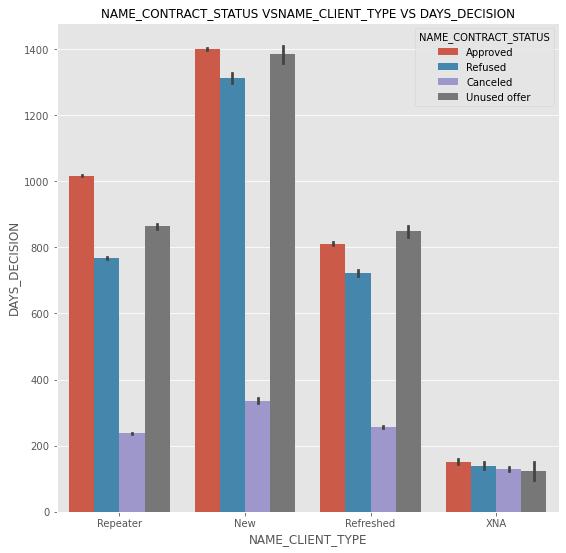

In [115]:
#Plotting a bar graph to check the relation between contract status ,days decision and type of client:

plt.figure(figsize=(9,9))
plt.title('NAME_CONTRACT_STATUS VSNAME_CLIENT_TYPE VS DAYS_DECISION', fontsize=12)
ax = sns.barplot(x="NAME_CLIENT_TYPE", y='DAYS_DECISION', hue="NAME_CONTRACT_STATUS", data=df1)
plt.show()

`Observation : Banks take most amount of time for new clients to make a decision and in case of Repeater client banks take more no of days to give their apporval while less in refusing and cancelling.`

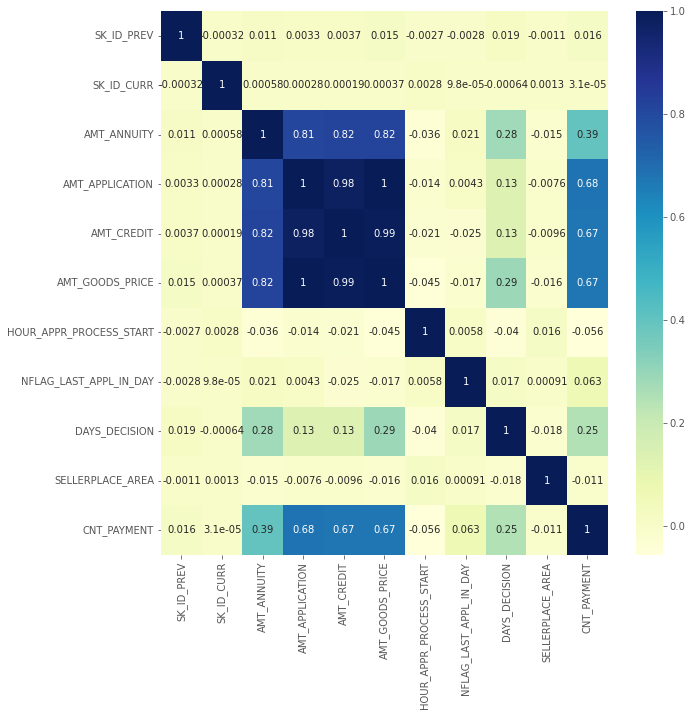

In [116]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.show()

Observation: 
- AMT_GOODS_PRICE have a directly proportional relation with AMT_APPLICATION and AMT_CREDIT.
- Credit amount client asked on the previous application and Goods price of goods that clients mentioned on previous application.

## G) Merging APPLICATION_DATA and PREVIOUS_APPLICATION:


In [117]:
df3 = pd.merge(df0,df1,on=['SK_ID_CURR'],how="inner")

In [118]:
#Checking head of the data:
df3.shape

(1408738, 101)

In [119]:
#Checking head of the data:
df3.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0  

In [120]:
#Checking info of the data:
df3.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1408738 entries, 0 to 1408737
Data columns (total 101 columns):
 #    Column                        Non-Null Count    Dtype   
---   ------                        --------------    -----   
 0    SK_ID_CURR                    1408738 non-null  int64   
 1    TARGET                        1408738 non-null  int64   
 2    NAME_CONTRACT_TYPE_x          1408738 non-null  object  
 3    CODE_GENDER                   1408738 non-null  object  
 4    FLAG_OWN_CAR                  1408738 non-null  object  
 5    FLAG_OWN_REALTY               1408738 non-null  object  
 6    CNT_CHILDREN                  1408738 non-null  int64   
 7    AMT_INCOME_TOTAL              1408738 non-null  float64 
 8    AMT_CREDIT_x                  1408738 non-null  float64 
 9    AMT_ANNUITY_x                 1408738 non-null  float64 
 10   AMT_GOODS_PRICE_x             1408738 non-null  float64 
 11   NAME_TYPE_SUITE               1408738 non-null  object  
 12 

In [121]:
#Checking Describe of data:
round(df3.describe(),0)

SK_ID_CURR     TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
count   1408738.0  1408738.0     1408738.0         1408738.0     1408738.0   
mean     278471.0        0.0           0.0          173347.0      588251.0   
std      102810.0        0.0           1.0          198858.0      385135.0   
min      100002.0        0.0           0.0           25650.0       45000.0   
25%      189341.0        0.0           0.0          112500.0      270000.0   
50%      278974.0        0.0           0.0          157500.0      508496.0   
75%      367525.0        0.0           1.0          207000.0      808650.0   
max      456255.0        1.0          19.0       117000000.0     4050000.0   

       AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  \
count      1408738.0          1408738.0                   1408738.0   
mean         27045.0           528211.0                         0.0   
std          13953.0           353340.0                         0.0   
min           1616.0            40500.0                         0.0   
25%          16844.0           238500.0                         0.0   
50%          24939.0           450000.0                         0.0   
75%          34578.0           679500.0                         0.0   
max         225000.0          4050000.0                         0.0   

       DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count   1408738.0      1408738.0          1408738.0        1408738.0   
mean      16320.0        72646.0             5001.0           3034.0   
std        4344.0       143323.0             3550.0           1508.0   
min        7489.0            0.0                0.0              0.0   
25%       12737.0         1042.0             1999.0           1783.0   
50%       16042.0         2401.0             4507.0           3329.0   
75%       19977.0         6313.0             7507.0           4319.0   
max       25201.0       365243.0            24672.0           7197.0   

       FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count   1408738.0       1408738.0        1408738.0         1408738.0   
mean          1.0             1.0              0.0               1.0   
std           0.0             0.0              0.0               0.0   
min           1.0             0.0              0.0               0.0   
25%           1.0             1.0              0.0               1.0   
50%           1.0             1.0              0.0               1.0   
75%           1.0             1.0              0.0               1.0   
max           1.0             1.0              1.0               1.0   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count   1408738.0   1408738.0        1408738.0             1408738.0   
mean          0.0         0.0              2.0                   2.0   
std           0.0         0.0              1.0                   0.0   
min           0.0         0.0              1.0                   1.0   
25%           0.0         0.0              2.0                   2.0   
50%           0.0         0.0              2.0                   2.0   
75%           1.0         0.0              3.0                   2.0   
max           1.0         1.0             20.0                   3.0   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START_x  \
count                    1408738.0                  1408738.0   
mean                           2.0                       12.0   
std                            0.0                        3.0   
min                            1.0                        0.0   
25%                            2.0                       10.0   
50%                            2.0                       12.0   
75%                            2.0                       14.0   
max                            3.0                       23.0   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                   1408738.0                   1408738.0   
m

### Analysis of merged data:


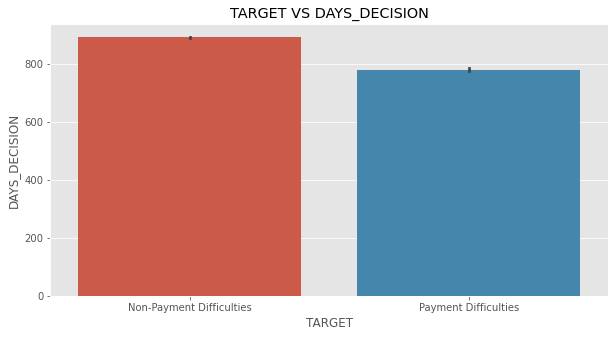

In [122]:
plt.figure(figsize=(10,5))
sns.barplot(data=df3, x="TARGET", y="DAYS_DECISION")
plt.title("TARGET VS DAYS_DECISION")
x=[0,1]
label=["Non-Payment Difficulties","Payment Difficulties"]
plt.xticks(x,label)
plt.show()

`Observation : Average time taken for apporval of loan application is lesser for Defaulters.`

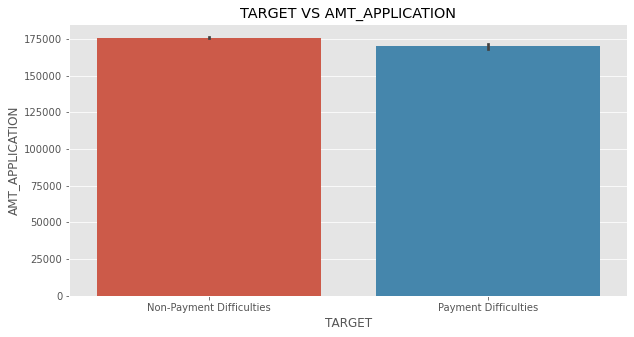

In [123]:
plt.figure(figsize=(10,5))
sns.barplot(data=df3, x="TARGET", y="AMT_APPLICATION")
plt.title("TARGET VS AMT_APPLICATION")
x=[0,1]
label=["Non-Payment Difficulties","Payment Difficulties"]
plt.xticks(x,label)
plt.show()

`Observation : Both of the charts are same.`

<Figure size 720x720 with 0 Axes>

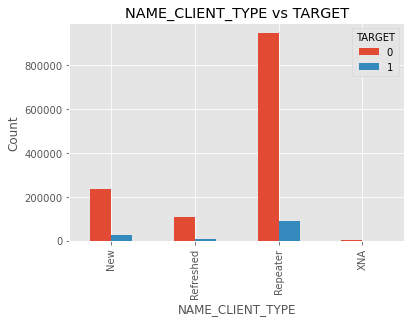

In [124]:
plt.figure(figsize=(10,10))
df3.pivot_table(values='SK_ID_CURR', index='NAME_CLIENT_TYPE',columns='TARGET',aggfunc='count').plot.bar()
plt.ylabel("Count")
plt.title("NAME_CLIENT_TYPE vs TARGET")
plt.show()

`Observation : Most of the defaulter are from the Repeater clients.`

In [125]:
#Removing "XAP" and "XNA" values from the merged data frame:
cols_df3 = df3[df3 != 'XAP']
df3 = cols_df3[cols_df3 !='XNA']

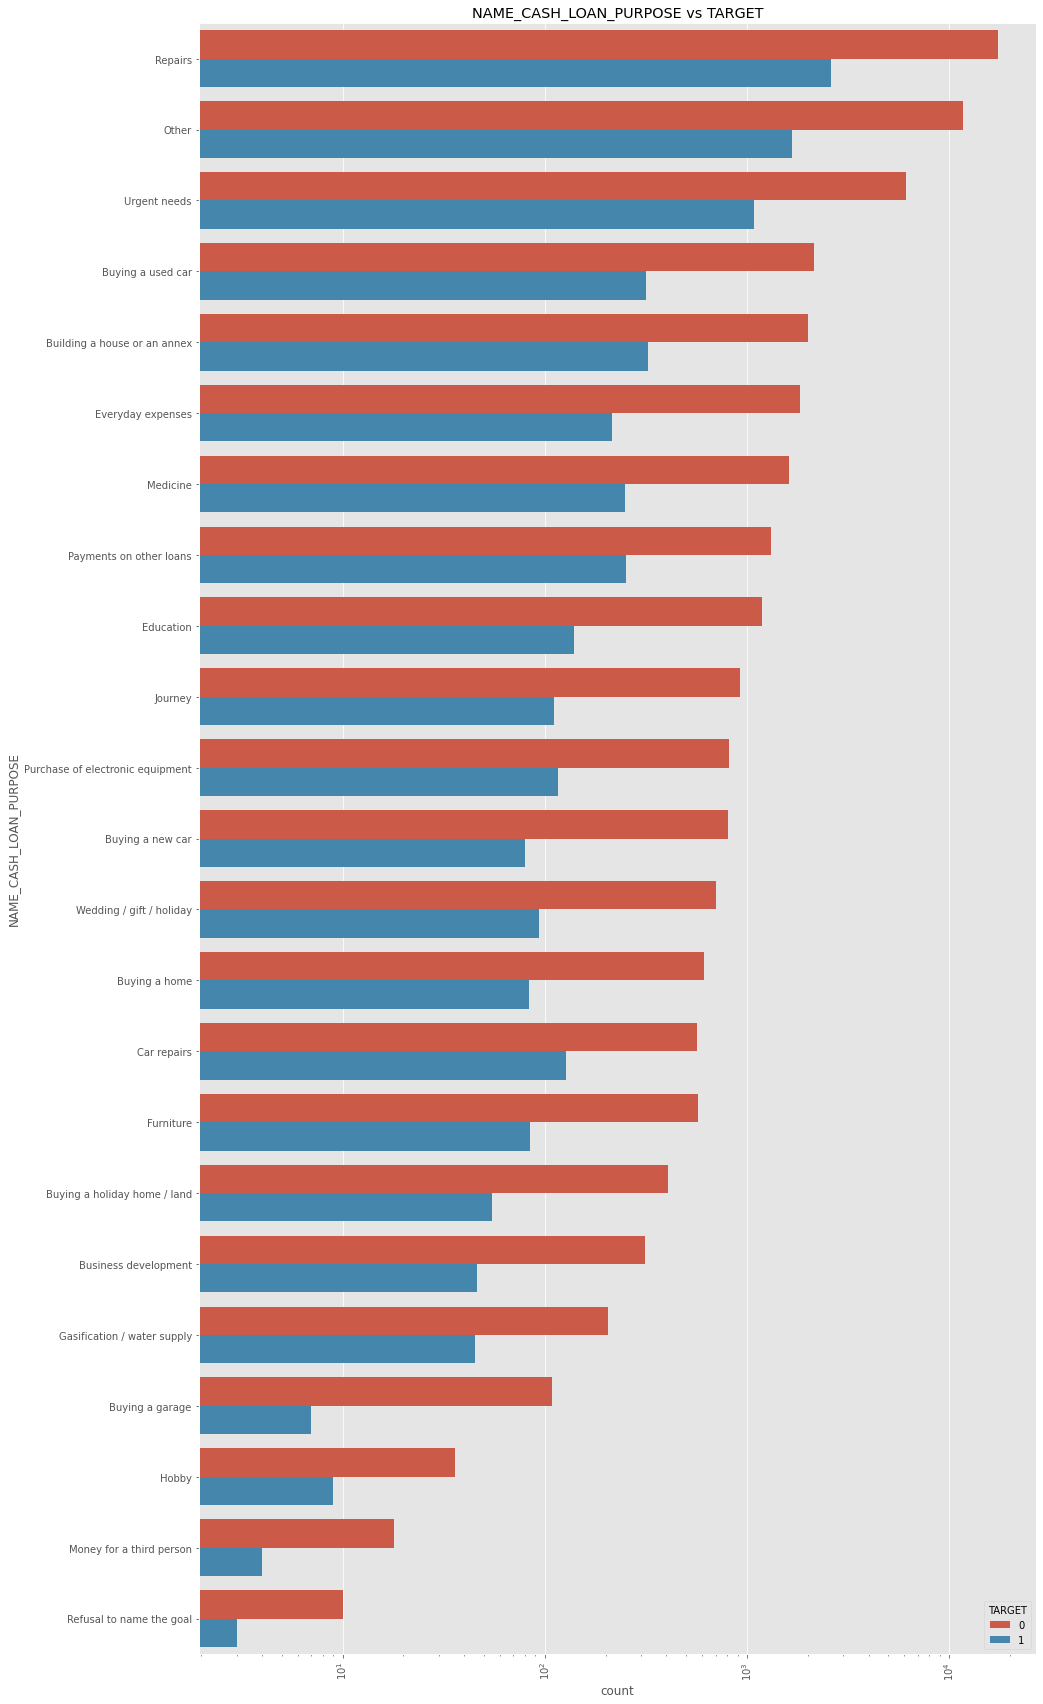

In [126]:
#Plotting a count plot NAME_CASH_LOAN_PURPOSE vs TARGET

plt.figure(figsize=(15,30))
plt.title('NAME_CASH_LOAN_PURPOSE vs TARGET')
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data = df3,y='NAME_CASH_LOAN_PURPOSE',order=df3['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET') 
plt.show()

`Observation : The highest number of defaulter and non defaulter are with purpose repairs, and buying a new garage has also less no of deafulters.`

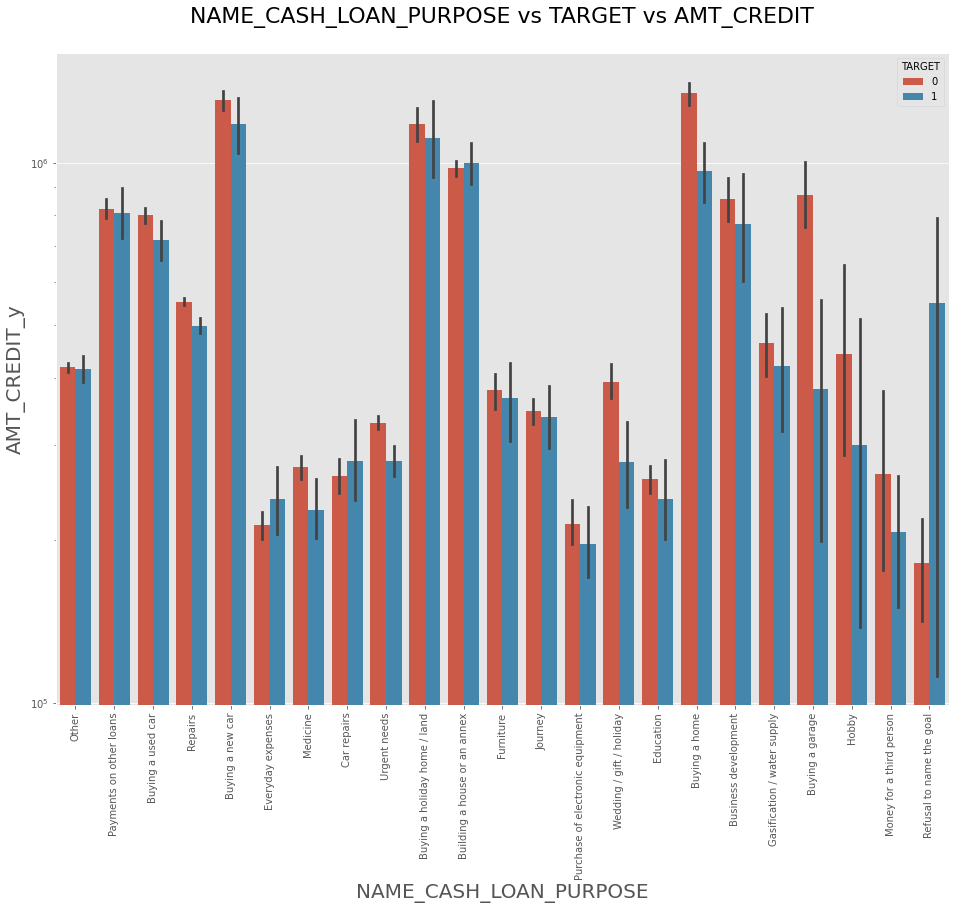

In [127]:
#Previous a bargraph for NAME_CASH_LOAN_PURPOSE vs TARGET vs AMT_CREDIT:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.barplot(data =df3, x='NAME_CASH_LOAN_PURPOSE',hue='TARGET',y='AMT_CREDIT_y')
plt.title('NAME_CASH_LOAN_PURPOSE vs TARGET vs AMT_CREDIT')
plt.show()

`Observation : Client who refused to name the goal have high credit amount and also these are the one high defaulters, buying a garage and buying a home are goods categories to give loan as they are among non defaulters and have high loan amount.`

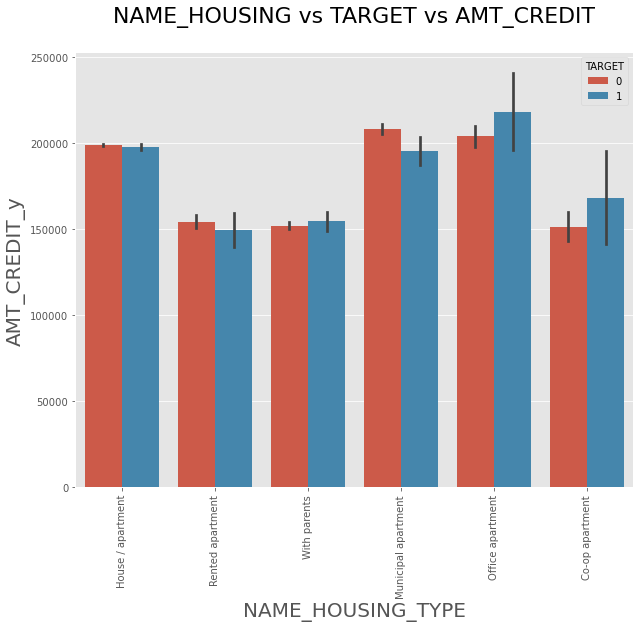

In [128]:
#Plotting a bar graph for analysis of NAME_HOUSING_TYPE
plt.figure(figsize=(10,8))
sns.barplot(data = df3 , x= "NAME_HOUSING_TYPE",y="AMT_CREDIT_y", hue="TARGET")
plt.title("NAME_HOUSING vs TARGET vs AMT_CREDIT")
plt.xticks(rotation = 90)
plt.show()

`Observation : Client with housing type as Office apartment and Co-op Apartment are the one with high Average Credit amount among defaulters category. Clients living with parents are among the safer side.`

## H) Conclusion :


- Data is Highly Imbalanced 91.9% is Client with Non-Payment Difficulties and 8.1% is client with Payment Difficulties.
- Imbalance Ratio is 11.36%.
- Cash Loans are more popular than Revolving loans.
- Females have higher chance of applying for a loan.
- Majority of clients who applied for loan are from Working class.
- Client with Secondary Education are more likely to apply for the loan.
- Count of married people appyling for a loan is higher than the rest.
- Majority of the clients have House/Apartment.
- Laborers are more frequent customer of bank.
- Most of the client who applied for loan are Unaccompained.
- (30-40) Age group people have a bit higher difficulty in paying loan while (60-70) age group people have lesser difficulty in paying their loans.
- People with very high salary have lesser difficulties in paying their loan but most number of people who go for loan are people with low salary.
- Female with the Secondary Education are the most defaulter.
- Client with married marital status and secondary education is at most risk of being a defaulter.
- Higher education client is least like to default on their loan.
- AMT_ANNUITY, AMT_CREDIT and AMT_GOODS_PRICE share a directly proportional relation.
- Consumer loans have the highest no of counts and also their approval rating is also the highest.
- Repeater clients are the one who have the highest frequency among the name_client_type and also they have the highest approval rating.
- Bank takes large number of days to approve a loan in comparison with to cancelling or refusing a loan.
- Banks take most amount of time for new clients to make a decision and in case of Repeater client banks take more no of days to give their apporval while less in refusing and cancelling.
- Average time taken for apporval of loan application is lesser for Defaulters.
- Most of the defaulter are from the Repeater clients.
- Client with housing type as Office apartment and Co-op Apartment are the one with high Average Credit amount among defaulters category. Clients living with parents are among the safer side.

`_____________________________________________________END_____________________________________________________________________`